# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Business Objectives:
The overarching business objective is to identify the key factors driving used car prices, providing actionable insights for dealerships to optimize inventory management and pricing strategies.
By understanding what consumers value most in a used car, dealerships can maximize profitability, enhance customer satisfaction and improve inventory.

Assess situation:
The dataset provided contains information on 426K used cars, which is a reduced version of the original dataset with 3 million records to ensure manageable processing speeds. data challenges include finding missing data, reducing outliers, finding the right balance between complexity and optimization.

Data Mining Goals:
Build regression models and use feature selection techniques to identify the most impactful features influencing used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [119]:
#library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
#Read the data from the csv file and convert to a dataframe

df = pd.read_csv('data/vehicles.csv')

In [121]:
#find the rows and the number of columns in the original dataset

df.shape

(426880, 18)

In [122]:
#Understand the structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [123]:
#Inspect the first few rows from the dataset to get an idea of the data

df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [124]:
#Understand the basic statistics of the numerical columns. From this we know there are only three numerical columns - price, year and odometer

df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [125]:
#Try to get more info on the columns available in the data

df.value_counts()

id          region                  price  year    manufacturer  model         condition  cylinders    fuel    odometer  title_status  transmission  VIN                drive  size       type    paint_color  state
7301592358  worcester / central MA  8995   2013.0  ford          explorer 4x4  good       6 cylinders  gas     150000.0  clean         automatic     1FM5K8AR8DGA42341  4wd    full-size  SUV     custom       ma       1
7314502778  chattanooga             29900  2019.0  ford          f-150         like new   8 cylinders  gas     23004.0   clean         automatic     1FTMF1C59KKD08613  rwd    full-size  truck   white        tn       1
7314502768  nashville               32900  2019.0  ford          transit       like new   6 cylinders  gas     15294.0   clean         automatic     1FTYR1YM3KKB52304  rwd    full-size  van     white        tn       1
7314502769  knoxville               36700  2019.0  ford          transit       like new   6 cylinders  gas     14985.0   clean       

In [126]:
#Find the number of null values in each column of the daataset. We will see what to do with these values later.

null_counts_sorted = df.isnull().sum().sort_values()
null_counts_sorted

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64

In [127]:
#Find the percentage of null values, the higher the null values, the less of resource is available from that column.

null_counts_percentage_sorted = (df.isna().sum()/df.shape[0]*100).sort_values()
null_counts_percentage_sorted

id               0.000000
price            0.000000
state            0.000000
region           0.000000
year             0.282281
transmission     0.598763
fuel             0.705819
odometer         1.030735
model            1.236179
title_status     1.930753
manufacturer     4.133714
type            21.752717
paint_color     30.501078
drive           30.586347
VIN             37.725356
condition       40.785232
cylinders       41.622470
size            71.767476
dtype: float64

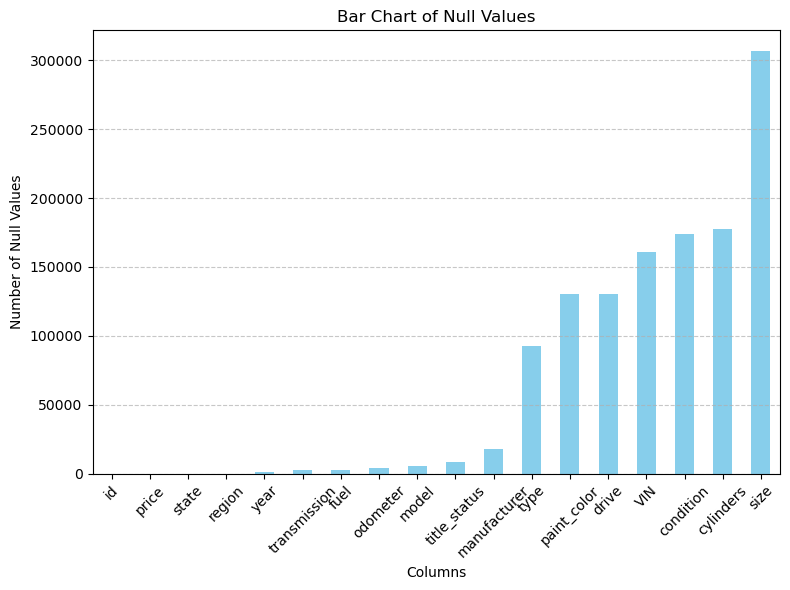

In [128]:
# A basic plot to understand how null values are distributed over the dataset

ax = null_counts_sorted.plot(kind='bar', figsize=(8, 6), color='skyblue')
ax.set_title("Bar Chart of Null Values")
ax.set_xlabel("Columns")
ax.set_ylabel("Number of Null Values")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show("png")

From the graph and data above, we observe that the 'size' column has approximately 72% null entries, indicating a significant amount of missing data. Similarly, other columns also exhibit a substantial proportion of missing values, including:

'cylinders': 41.6%
'condition': 40%
'VIN': 37.73%
'drive': 30.58%
'paint_color': 30.5%
'type': 21.75%

This high percentage of missing values in multiple columns necessitates a deeper analysis to determine how to handle them effectively. Possible strategies include imputing missing values, dropping columns or rows, or exploring if these features are critical for the analysis. Further exploration is essential to decide the most appropriate approach for this dataset.

In [129]:
#'id' is expcted to be unique, find if there are any duplicate values in it.

df['id'].duplicated().value_counts()

id
False    426880
Name: count, dtype: int64

In [130]:
# Find duplicates in VIN

df['VIN'].duplicated().value_counts()

VIN
True     308633
False    118247
Name: count, dtype: int64

The 'VIN' and 'id' columns might initially seem useful, but they do not contribute any meaningful value or insight to the dataset, especially in predicting prices. Additionally, a significant portion of the 'VIN' entries are duplicated, further reducing its relevance.And 'id' is always treated as a unique identifier, but we already have index for it.  Therefore, we can safely remove the 'VIN' and 'id' column from the dataset.

Additionally, since the 'size' column contains over 70% null values, it holds little value for analysis and can be removed. Similarly, the 'region' column appears redundant as we already have the 'state' column to indicate the origin of a car. To streamline the dataset, we can safely remove both columns.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [131]:
df.drop(['size', 'id', 'VIN', 'region'], axis=1,inplace=True)
df

price    year manufacturer                     model condition  \
0        6000     NaN          NaN                       NaN       NaN   
1       11900     NaN          NaN                       NaN       NaN   
2       21000     NaN          NaN                       NaN       NaN   
3        1500     NaN          NaN                       NaN       NaN   
4        4900     NaN          NaN                       NaN       NaN   
...       ...     ...          ...                       ...       ...   
426875  23590  2019.0       nissan         maxima s sedan 4d      good   
426876  30590  2020.0        volvo  s60 t5 momentum sedan 4d      good   
426877  34990  2020.0     cadillac          xt4 sport suv 4d      good   
426878  28990  2018.0        lexus           es 350 sedan 4d      good   
426879  30590  2019.0          bmw  4 series 430i gran coupe      good   

          cylinders    fuel  odometer title_status transmission drive  \
0               NaN     NaN       NaN          NaN          NaN   NaN   
1               NaN     NaN       NaN          NaN          NaN   NaN   
2               NaN     NaN       NaN          NaN          NaN   NaN   
3               NaN     NaN       NaN          NaN          NaN   NaN   
4               NaN     NaN       NaN          NaN          NaN   NaN   
...             ...     ...       ...          ...          ...   ...   
426875  6 cylinders     gas   32226.0        clean        other   fwd   
426876          NaN     gas   12029.0        clean        other   fwd   
426877          NaN  diesel    4174.0        clean        other   NaN   
426878  6 cylinders     gas   30112.0        clean        other   fwd   
426879          NaN     gas   22716.0        clean        other   rwd   

             type paint_color state  
0             NaN         NaN    az  
1             NaN         NaN    ar  
2             NaN         NaN    fl  
3             NaN         NaN    ma  
4             NaN         NaN    nc  
...           ...         ...   ...  
426875      sedan         NaN    wy  
426876      sedan         red    wy  
426877  hatchback       white    wy  
426878      sedan      silver    wy  
426879      coupe         NaN    wy  

[426880 rows x 14 columns]

In [132]:
# See if all values in a row are null, if so, remove them from dataset

df.dropna(how='all', inplace=True)
df.shape

(426880, 14)

In [133]:
#Find all numeric columns in the DataFrame and compute the correlation matrix:

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

price      year  odometer
price     1.000000 -0.004925  0.010032
year     -0.004925  1.000000 -0.157215
odometer  0.010032 -0.157215  1.000000

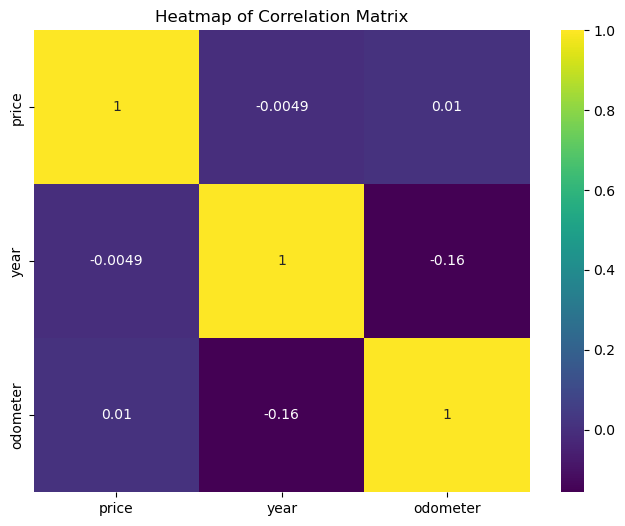

In [134]:
# A heatmap to visualize the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show("png")

The heatmap and correlation matrix do not specify any strong corelation between any of the numeric data columns. 

price:
Weak positive correlation with odometer (0.010032).
Almost no correlation with year (-0.004925).

year and odometer:
Slight negative correlation (-0.157), suggesting older cars may have higher odometer readings.

In [135]:
#Find the unique values in columns

for col in df:
    print(col, df[col].unique(), "\n")

price [ 6000 11900 21000 ...  6328 19853 17873] 

year [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.] 

manufacturer [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'b

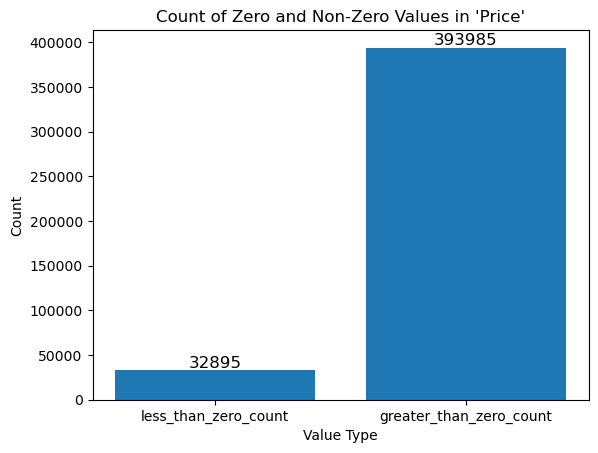

Incorrect values in 'Price': 32895
Correct values in 'Price': 393985


In [136]:
#Plot the price column to show the correct and incorrect price values.

less_than_zero_count = (df["price"] <= 0).sum()
greater_than_zero_count = (df["price"] > 0).sum()

# Create a dictionary for plotting
counts = {"less_than_zero_count": less_than_zero_count, "greater_than_zero_count": greater_than_zero_count}

# Plot as a Bar Plot
bars = plt.bar(counts.keys(), counts.values())
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 5,              
        str(bar.get_height()),             
        ha='center',                       
        va='bottom',                       
        fontsize=12                       
    )
    
plt.title("Count of Zero and Non-Zero Values in 'Price'")
plt.xlabel("Value Type")
plt.ylabel("Count")
plt.show("png")
print(f"Incorrect values in 'Price': {less_than_zero_count}")
print(f"Correct values in 'Price': {greater_than_zero_count}")

The dataset contains approximately 32895 rows where the 'price' value is less than or equal to zero. For our prediction model, we require 'price' to have positive values, as it aligns with the realistic context - car prices cannot be zero or negative. Therefore, we will filter the dataset to include only rows where 'price' is greater than zero, ensuring the data is meaningful for building accurate prediction models.

In [137]:
#Creating dataset with only positive values of price

df1 = df.query("price > 0")
df2 = df.query('price <= 0')

In [138]:
df1.shape

(393985, 14)

In [139]:
df1['price'].describe()

count    3.939850e+05
mean     8.147763e+04
std      1.268064e+07
min      1.000000e+00
25%      7.000000e+03
50%      1.500000e+04
75%      2.759000e+04
max      3.736929e+09
Name: price, dtype: float64

Now lets go ahead and work on outliers. Outliers are extreme values in a dataset that deviate significantly from the majority of the data. These are extreme values that can distort statistical metrics, skew data visualizations, and negatively impact the performance of models like regression or clustering. Removing outliers ensures accurate analysis, better model performance, and meaningful data representation, especially when they arise from errors or irrelevant values. This method, remove_outliers_IQR, removes outliers from a specified column in a pandas DataFrame using the Interquartile Range (IQR) method. This can be reused for multiple numerical fields.

In [140]:
 def remove_outliers_IQR(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

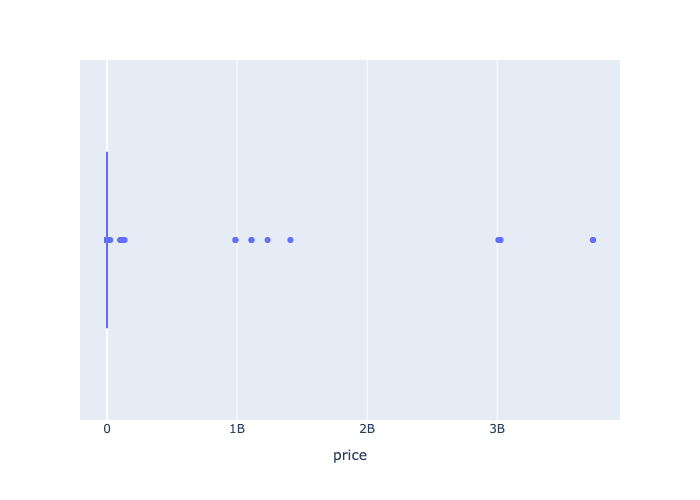

In [141]:
#box plot of 'price' to visualize outliers
boxplot = px.box(df1, x ='price')
boxplot.show("png")

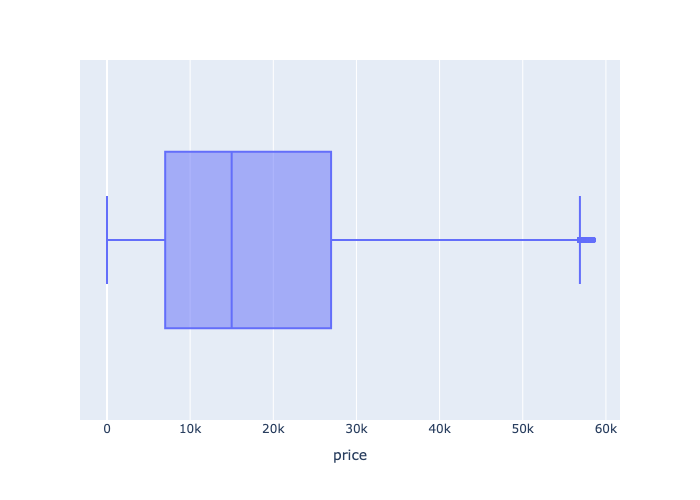

In [142]:
#use remove_outliers_IQR to remove outliers from 'price'

df_price = remove_outliers_IQR(df1, 'price')
boxplot =  px.box(df_price, x ='price')
boxplot.show("png")

<Axes: xlabel='price', ylabel='Count'>

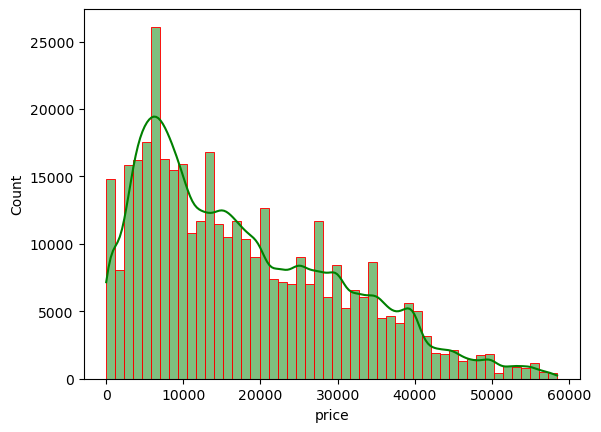

In [143]:
#distribution of 'price'

sns.histplot(df_price['price'], bins=50, kde=True, color='green', edgecolor='red')

Car prices tend to cluster at the lower end, reflecting more common affordability levels. As prices increase, the number of buyers decreases, following the typical demand trend for higher-priced items.

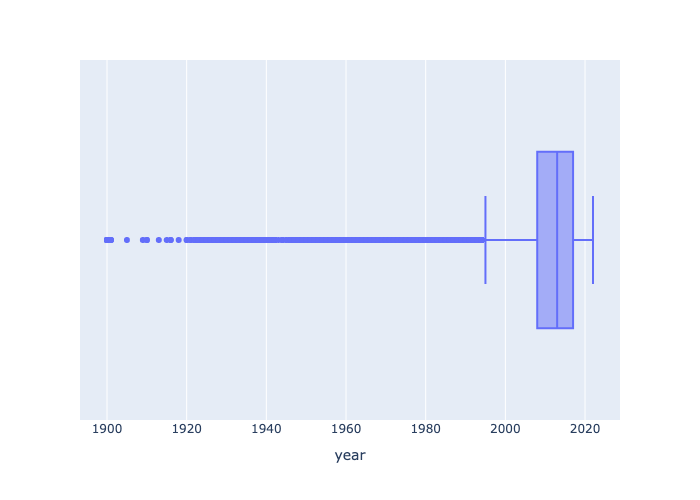

In [144]:
#box plot of 'year' to visualize outliers

boxplot =  px.box(df_price, x ='year')
boxplot.show("png")

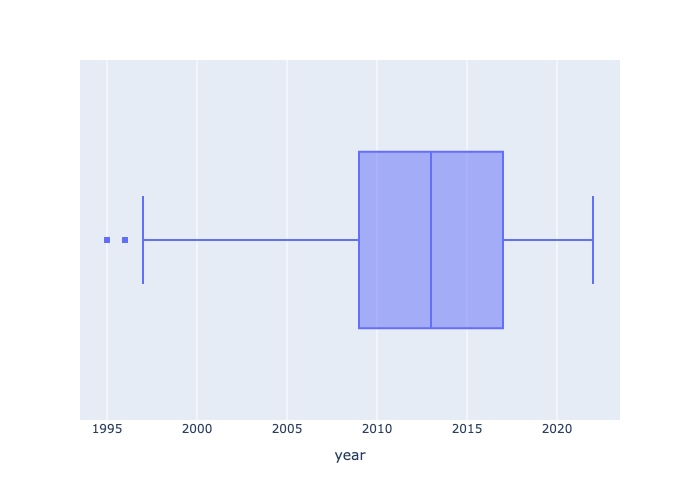

In [145]:
#use remove_outliers_IQR to remove outliers from 'year'

df_year = remove_outliers_IQR(df_price, 'year')
boxplot =  px.box(df_year, x ='year')
boxplot.show("png")

<Axes: xlabel='year', ylabel='Count'>

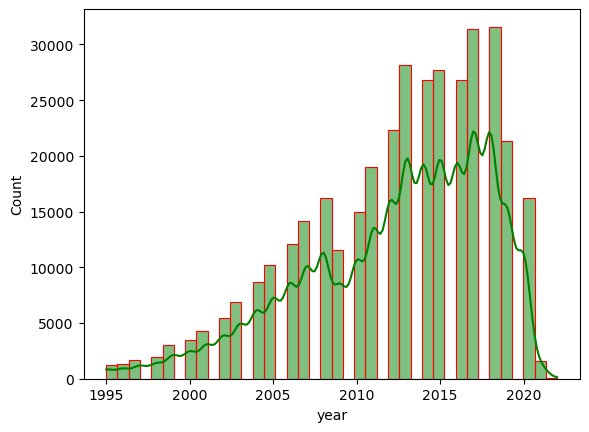

In [146]:
#distribution of 'year'

sns.histplot(df_year['year'], bins=40, kde=True, color='green', edgecolor='red')

Car purchases have grown substantially over the last decade, particularly after 2010. However, a sharp decline in 2020 suggests a significant impact of the COVID-19 pandemic on the car sales.

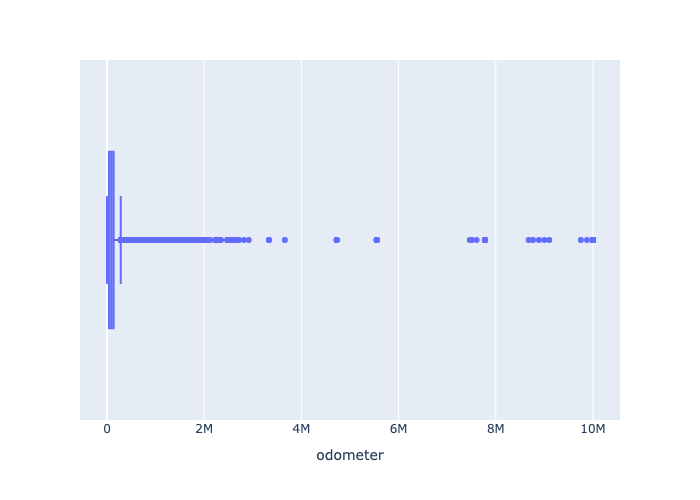

In [147]:
#box plot of 'odometer' to visualize outliers

boxplot = px.box(df_year, x ='odometer')
boxplot.show("png")

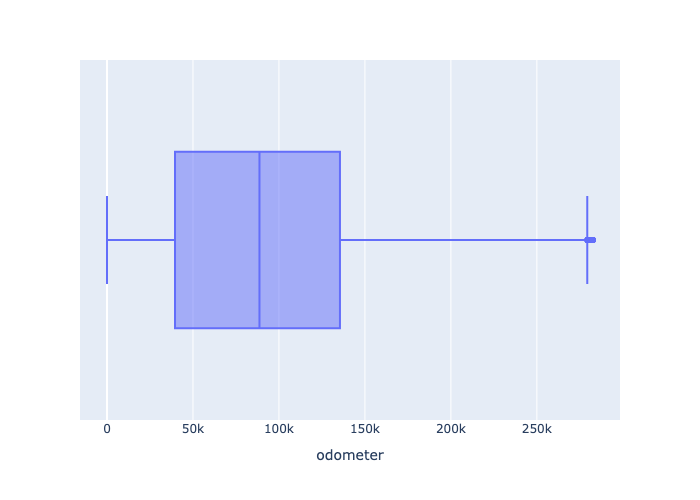

In [148]:
#use remove_outliers_IQR to remove outliers from 'year'

df_odometer = remove_outliers_IQR(df_year, 'odometer')
boxplot = px.box(df_odometer, x ='odometer')
boxplot.show("png")

<Axes: xlabel='odometer', ylabel='Count'>

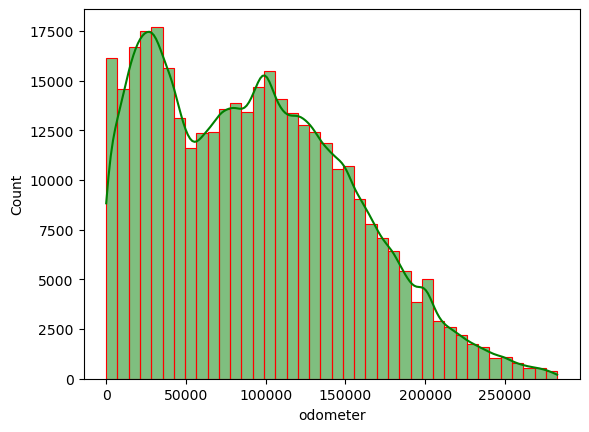

In [149]:
#distribution of 'odometer'

sns.histplot(df_odometer['odometer'], bins=40, kde=True, color='green', edgecolor='red')

It is logical to see more cars being sold with lower odometer readings, as higher odometer values typically correlate with reduced sales demand.

In [150]:
#create a new dataset

df_clean = df_odometer.copy()
df_clean.shape

(364750, 14)

In [151]:
for col in df_clean:
    print(col, df[col].unique(), "\n")

price [ 6000 11900 21000 ...  6328 19853 17873] 

year [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.] 

manufacturer [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'b

The 'year' column is incorrectly stored as a float, which should not be the case. We'll convert it to an integer data type for accuracy. Additionally, the 'cylinder' column contains redundant text (e.g., the string 'cylinder' in each entry), which we can clean up for clarity

In [152]:
df_clean['year']  = df_clean['year'].astype('Int64')
df_clean["cylinders"] = df_clean['cylinders'].str.replace(' cylinders', '')
df_clean

price  year manufacturer                     model  condition  \
27      33590  2014          gmc  sierra 1500 crew cab slt       good   
28      22590  2010    chevrolet            silverado 1500       good   
29      39590  2020    chevrolet       silverado 1500 crew       good   
30      30990  2017       toyota      tundra double cab sr       good   
31      15000  2013         ford                 f-150 xlt  excellent   
...       ...   ...          ...                       ...        ...   
426875  23590  2019       nissan         maxima s sedan 4d       good   
426876  30590  2020        volvo  s60 t5 momentum sedan 4d       good   
426877  34990  2020     cadillac          xt4 sport suv 4d       good   
426878  28990  2018        lexus           es 350 sedan 4d       good   
426879  30590  2019          bmw  4 series 430i gran coupe       good   

       cylinders    fuel  odometer title_status transmission drive       type  \
27             8     gas   57923.0        clean        other   NaN     pickup   
28             8     gas   71229.0        clean        other   NaN     pickup   
29             8     gas   19160.0        clean        other   NaN     pickup   
30             8     gas   41124.0        clean        other   NaN     pickup   
31             6     gas  128000.0        clean    automatic   rwd      truck   
...          ...     ...       ...          ...          ...   ...        ...   
426875         6     gas   32226.0        clean        other   fwd      sedan   
426876       NaN     gas   12029.0        clean        other   fwd      sedan   
426877       NaN  diesel    4174.0        clean        other   NaN  hatchback   
426878         6     gas   30112.0        clean        other   fwd      sedan   
426879       NaN     gas   22716.0        clean        other   rwd      coupe   

       paint_color state  
27           white    al  
28            blue    al  
29             red    al  
30             red    al  
31           black    al  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[364750 rows x 14 columns]

<Axes: >

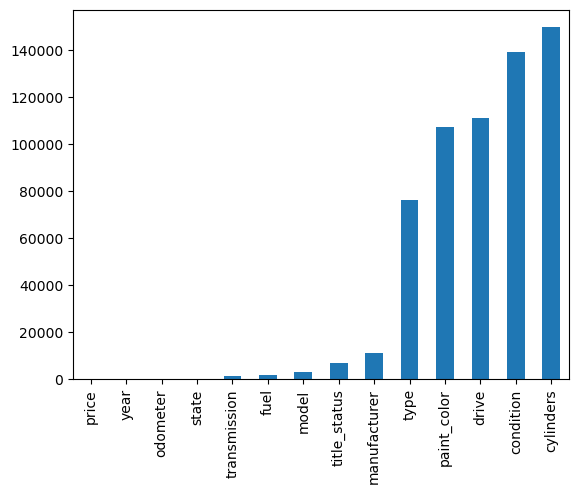

In [153]:
#Now, lets check out null values again after removing the outliers.

df_clean.isnull().sum().sort_values().plot(kind="bar")

In [154]:
#Find the percebtage of null values so that its easy to understand

(df_clean.isna().sum()/df_clean.shape[0]*100).sort_values()

price            0.000000
year             0.000000
odometer         0.000000
state            0.000000
transmission     0.392324
fuel             0.569157
model            0.839479
title_status     1.913091
manufacturer     3.070870
type            20.924469
paint_color     29.376285
drive           30.464154
condition       38.211652
cylinders       41.042358
dtype: float64

In [155]:
#fCreate a dataframe just to work on categorical data and visualize them on plots. 
# Filling the null values with NotAvailable so that it would be easy to plot

df_graph = df_clean.fillna("NotAvailable")
(df_graph.isna().sum()/df_graph.shape[0]*100).sort_values()

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

Let's create a reusable method to generate histograms and pie charts for visualizing data distributions for categorical data. We'll use it to display the "before" and the "after" values for better comparison.

In [156]:
def create_histogram(column):
    return px.histogram(
        df_graph,
        x=column,
        title="Distribution of Cars Based on " +column.capitalize(),
        color=column, 
        color_discrete_sequence=px.colors.qualitative.Set2
    )

Going forward, let's adopt this rule: If the number of "NotAvailable" values is significantly large, we should remove them from the dataset to avoid complications with handling excessive null values or altering the dataset excessively. However, if the count is relatively small, we can replace them with the most frequent value (mode) of the respective column to maintain the dataset's consistency.

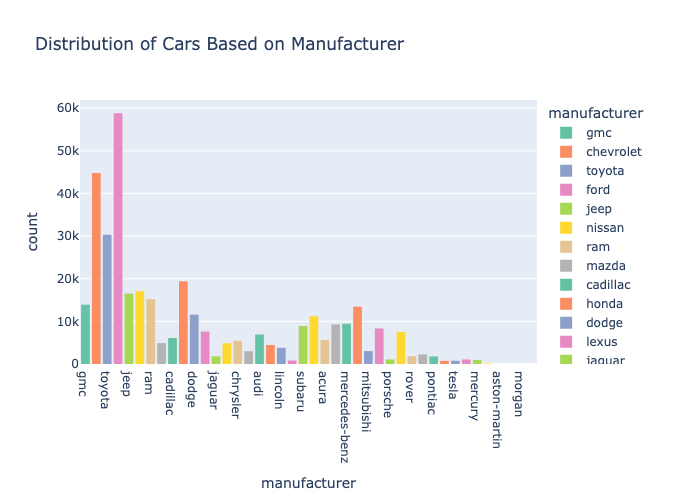

In [157]:
# Lets have a first look at the 'manufacturer' column
histplot = create_histogram('manufacturer')
histplot.show("png")

(364750, 14)


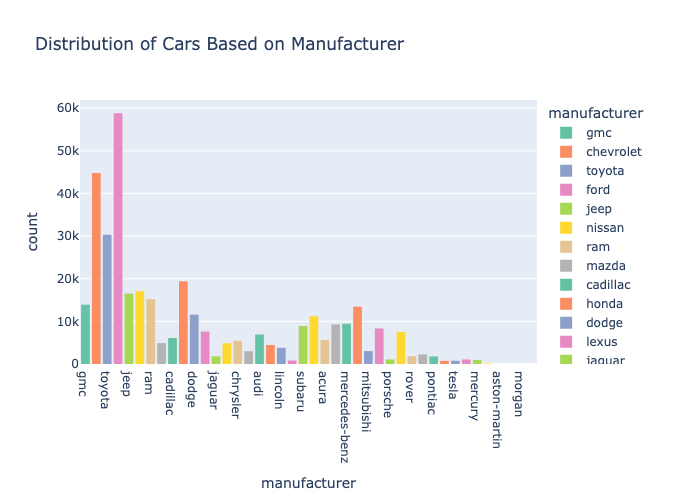

In [158]:
#The number of "notAvailable" is very small, let's replace it with mode.

df_graph["manufacturer"].replace('NotAvailable',df_graph["manufacturer"].mode()[0])
print(df_graph.shape)

#Using hist0gram here because of the ease of displaying the wide verity of values
histplot = create_histogram('manufacturer')
histplot.show("png")

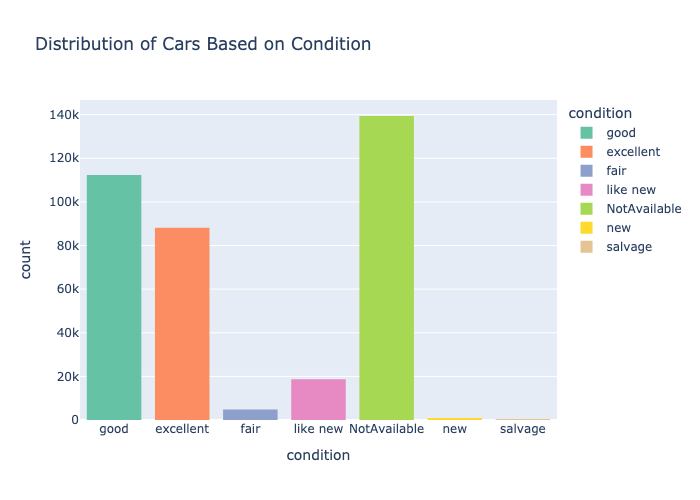

In [159]:
histplot = create_histogram('condition')
histplot.show("png")

(225373, 14)


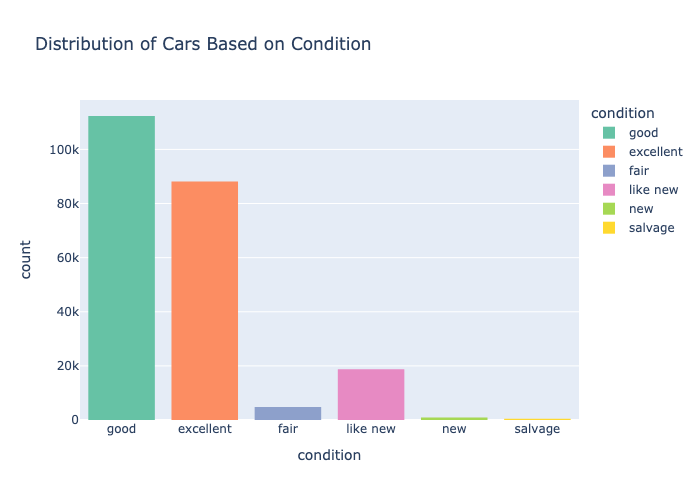

In [160]:
#The number of "notAvailable" is the largest in this data, lets remove it.

df_graph = df_graph.query("condition != 'NotAvailable' ")
print(df_graph.shape)
histplot = create_histogram('condition')
histplot.show("png")

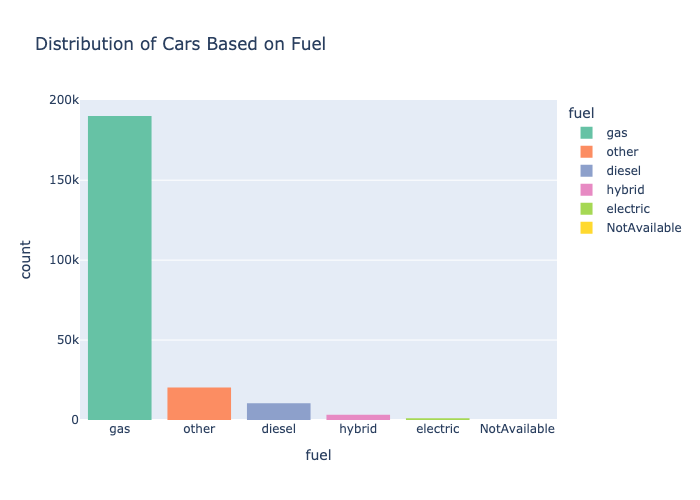

In [161]:
histplot = create_histogram('fuel')
histplot.show("png")

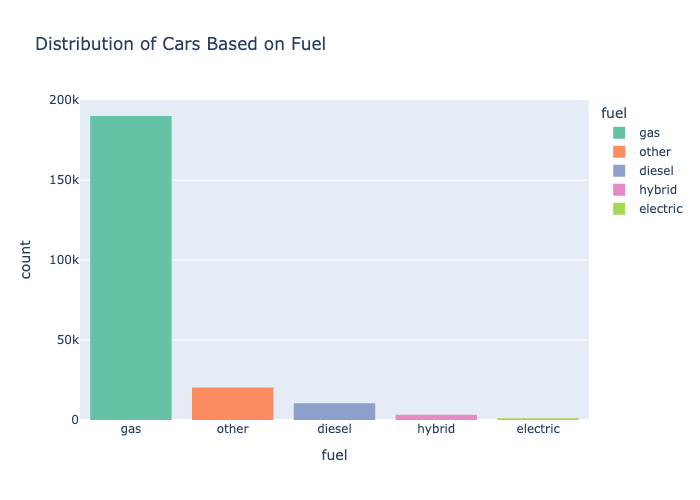

In [162]:
df_graph["fuel"] = df_graph["fuel"].replace('NotAvailable',df_graph["fuel"].mode()[0])
histplot = create_histogram('fuel')
histplot.show("png")

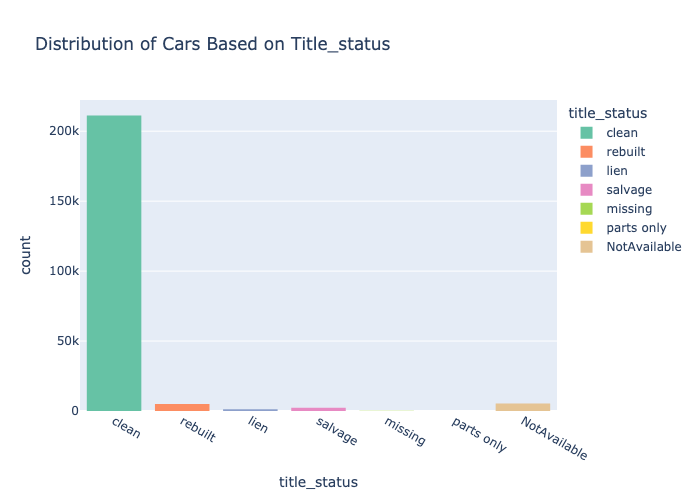

In [163]:
histplot = create_histogram('title_status')
histplot.show("png")

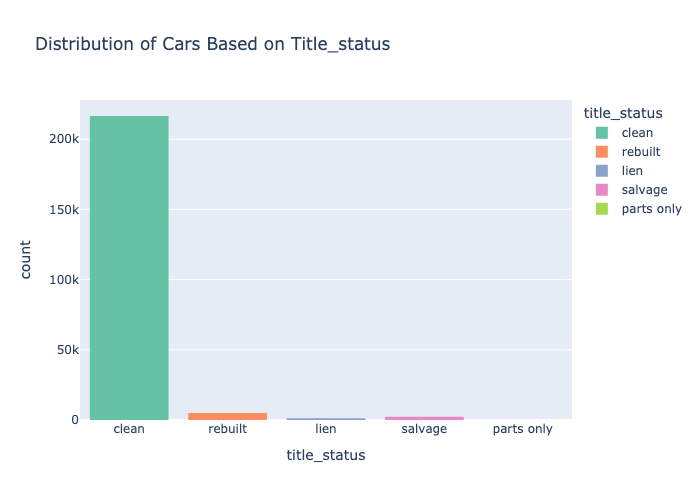

In [164]:
df_graph = df_graph.query("title_status != 'missing' ")
df_graph["title_status"] = df_graph["title_status"].replace('NotAvailable',df_graph["title_status"].mode()[0])
histplot = create_histogram('title_status')
histplot.show("png")

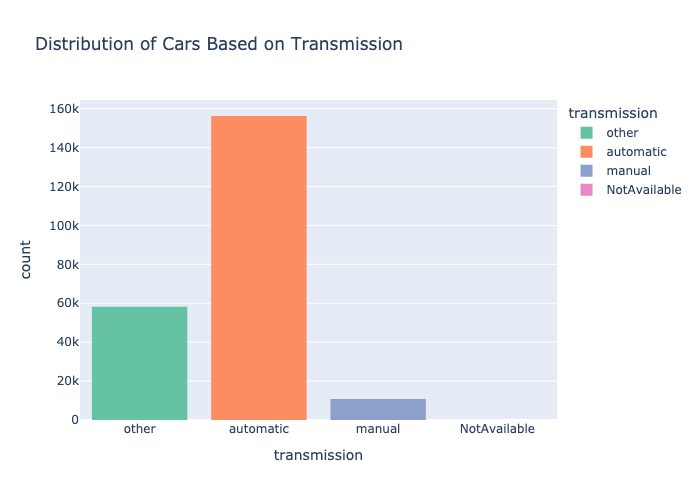

In [165]:
histplot = create_histogram('transmission')
histplot.show("png")

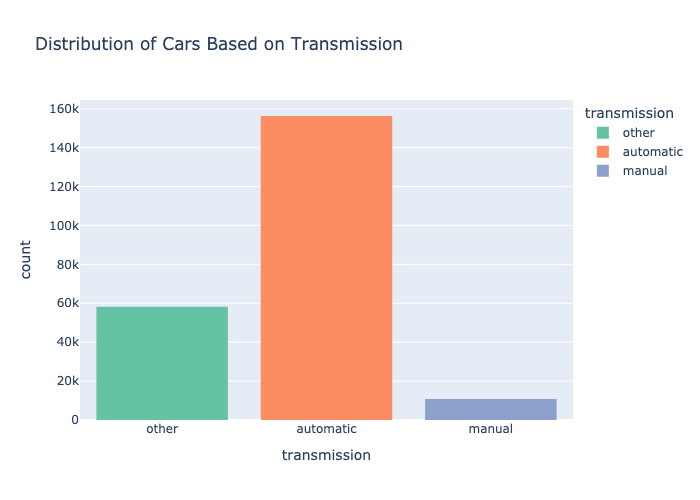

In [166]:
df_graph["transmission"] = df_graph["transmission"].replace('NotAvailable',df_graph["transmission"].mode()[0])
histplot = create_histogram('transmission')
histplot.show("png")

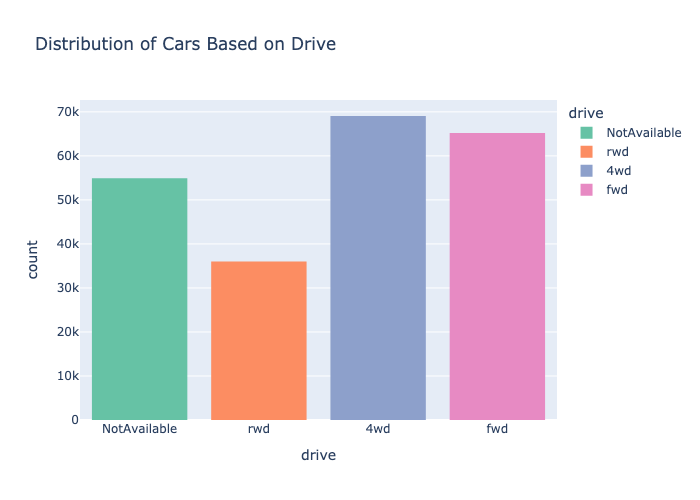

In [167]:
histplot = create_histogram('drive')
histplot.show("png")

(170284, 14)


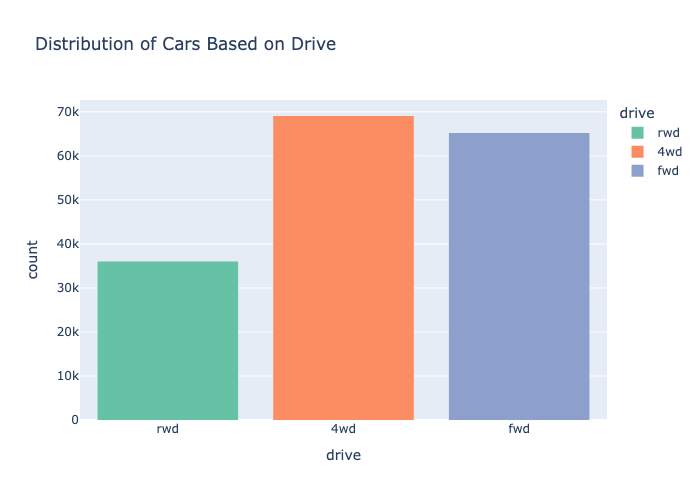

In [168]:
df_graph = df_graph.query("drive != 'NotAvailable' ")
print(df_graph.shape)
histplot = create_histogram('drive')
histplot.show("png")

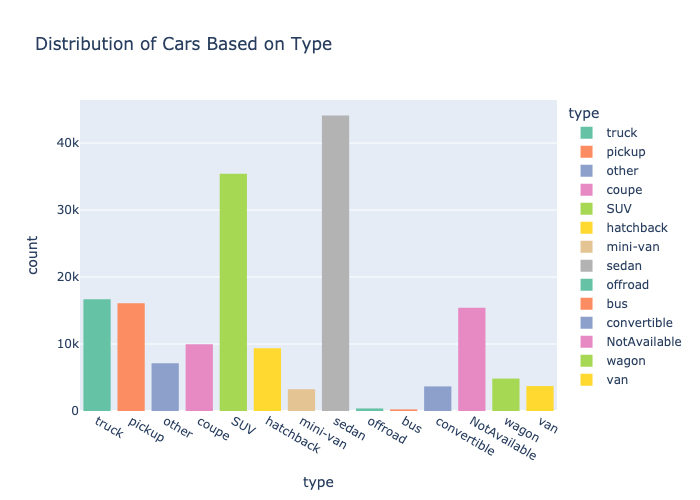

In [169]:
histplot = create_histogram('type')
histplot.show("png")

(154868, 14)


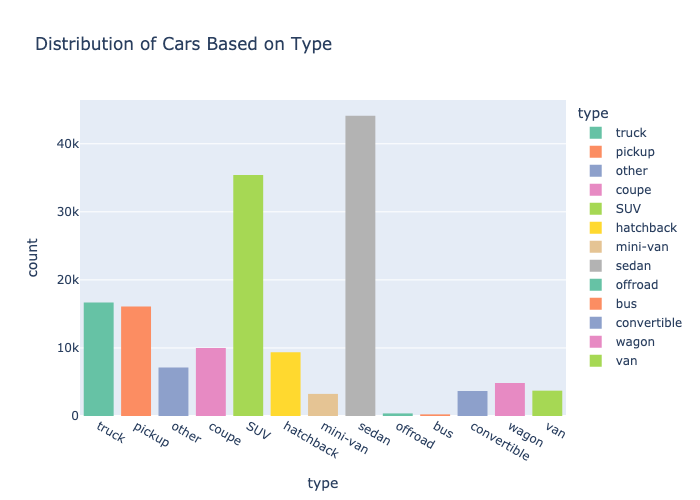

In [170]:
df_graph = df_graph.query("type != 'NotAvailable' ")
print(df_graph.shape)
histplot = create_histogram('type')
histplot.show("png")

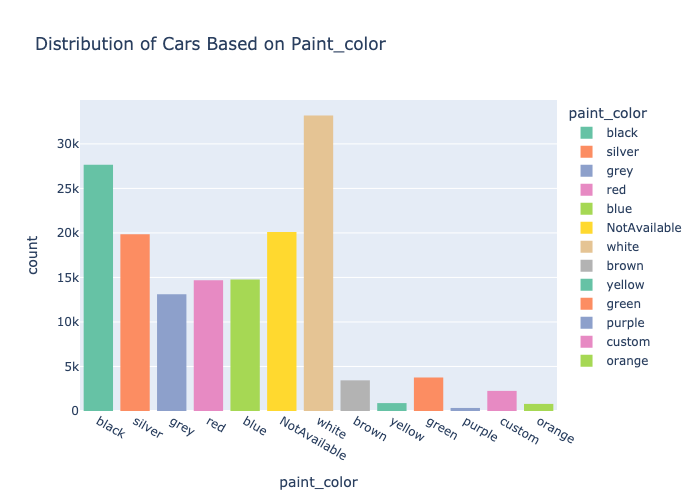

In [171]:
histplot = create_histogram('paint_color')
histplot.show("png")

(134757, 14)


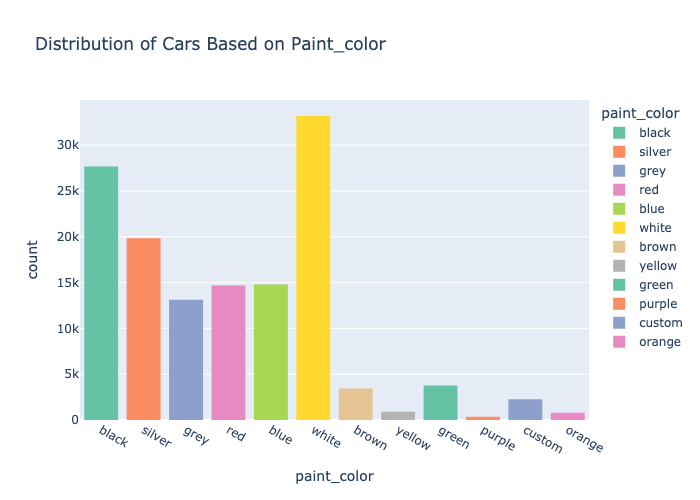

In [172]:
df_graph = df_graph.query("paint_color != 'NotAvailable' ")
print(df_graph.shape)
histplot = create_histogram('paint_color')
histplot.show("png")

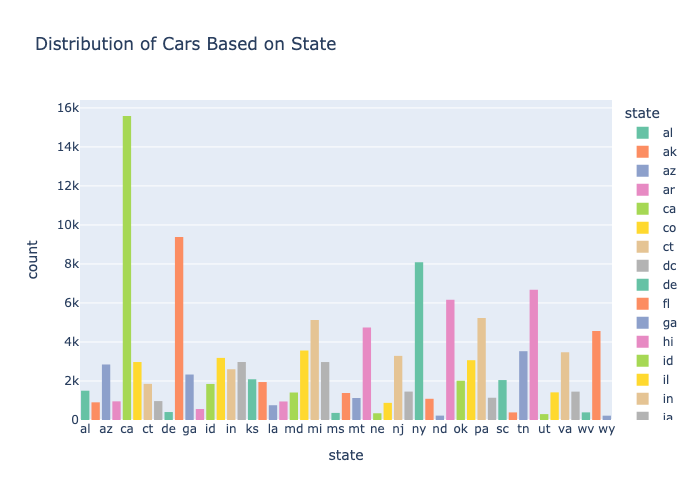

In [173]:
histplot = create_histogram('state')
histplot.show("png")

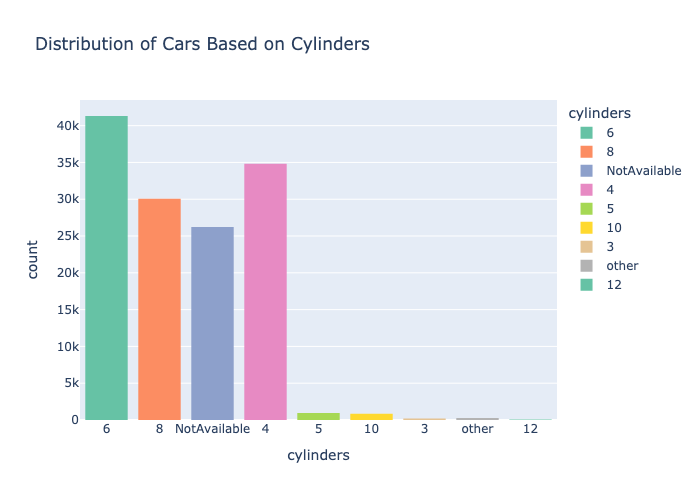

In [174]:
histplot = create_histogram('cylinders')
histplot.show("png")

(108535, 14)


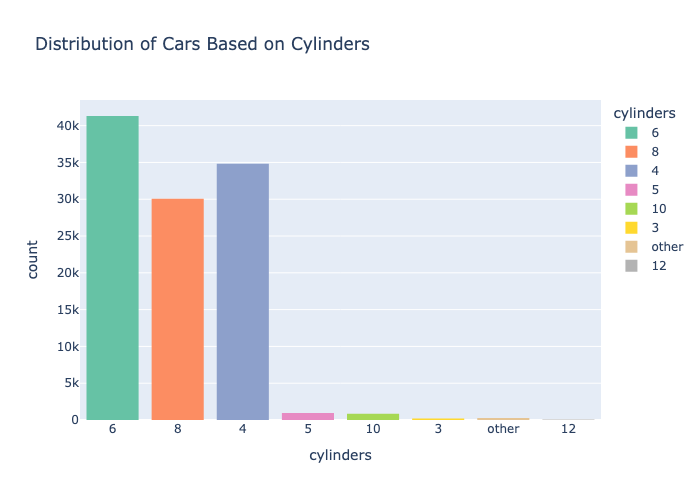

In [175]:
df_graph = df_graph.query("cylinders != 'NotAvailable' ")
print(df_graph.shape)
histplot = create_histogram('cylinders')
histplot.show("png")

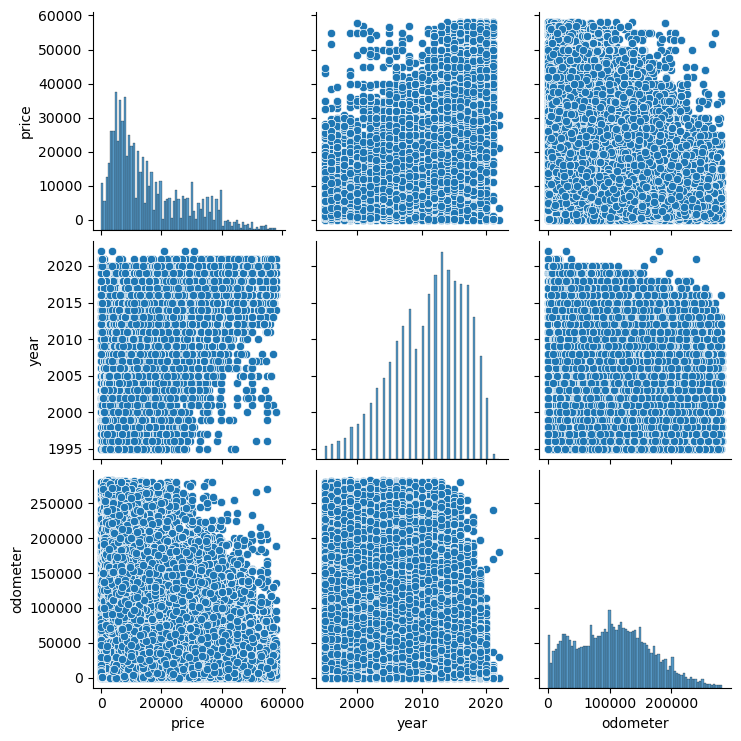

In [176]:
sns.pairplot(df_graph)

Observations:

Price vs. Year:
Positive trend: As the year (car model) increases, prices tend to be higher.
Suggests newer cars are generally priced higher, which aligns with common trends.

Price vs. Odometer:
Negative trend: Cars with higher mileage (odometer reading) have lower prices.
Indicates depreciation in value with increased usage.

Year vs. Odometer:
Negative trend: Older cars (lower year values) tend to have higher odometer readings.
Reflects that older cars are driven more over time, which is expected.

In [177]:
label_encoder = preprocessing.LabelEncoder()

Since the dataset has a large number of dimensions, using a Label Encoder is a more efficient choice. If we were to use a One-Hot Encoder, it could significantly increase the complexity of the dataset by creating a large number of additional columns, which may lead to unnecessary computational overhead.

In [178]:
#identify the numeric columns

cols = df_graph.columns
num_cols = df_graph._get_numeric_data().columns

num_cols

Index(['price', 'year', 'odometer'], dtype='object')

In [179]:
# Now, take out the numeric colums to find the categorical ones for label encoding

categoricalCols = list(set(cols) - set(num_cols))
categoricalCols

['condition',
 'transmission',
 'drive',
 'title_status',
 'state',
 'paint_color',
 'model',
 'type',
 'manufacturer',
 'cylinders',
 'fuel']

In [180]:
#Create a copy of the dataset to apply label encoding, 
#ensuring the original dataset remains unaffected for future reference or alternative processing.
df_encoded = df_graph.copy()
for col in categoricalCols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    # df_encoded[col] = pd.to_numeric(df_encoded[col])
    df_encoded[col] = df_encoded[col].astype(str).astype(int)

#print(df_2.head())
print(df_encoded.head())

    price  year  manufacturer  model  condition  cylinders  fuel  odometer  \
31  15000  2013            13   5284          0          5     2  128000.0   
32  27990  2012            14   9362          2          6     2   68696.0   
33  34590  2016             8   9467          2          5     2   29499.0   
34  35000  2019            38  10081          0          5     2   43000.0   
35  29990  2016             8   3835          2          5     2   17302.0   

    title_status  transmission  drive  type  paint_color  state  
31             0             0      2    10            0      1  
32             0             2      0     8            0      1  
33             0             2      0     8            9      1  
34             0             0      0    10            5      1  
35             0             2      0     8            8      1  


In [181]:
# Now that encodings are done, we have all numerical data. Let's find the corelation.

correlation_matrix = df_encoded.corr()
correlation_matrix

price      year  manufacturer     model  condition  \
price         1.000000  0.592752     -0.070936  0.035350   0.132467   
year          0.592752  1.000000      0.000221  0.028899   0.060948   
manufacturer -0.070936  0.000221      1.000000  0.042551  -0.026647   
model         0.035350  0.028899      0.042551  1.000000  -0.006878   
condition     0.132467  0.060948     -0.026647 -0.006878   1.000000   
cylinders     0.344713 -0.087821     -0.208010  0.071829   0.079985   
fuel         -0.139782  0.099185      0.051428  0.057286   0.040841   
odometer     -0.571841 -0.601621      0.035725  0.010508  -0.108495   
title_status -0.058030  0.046533      0.024823 -0.016559   0.008922   
transmission  0.414717  0.272573     -0.015584 -0.006126   0.206183   
drive        -0.076641 -0.092577     -0.125148 -0.154346   0.057105   
type          0.060595  0.027098      0.003824 -0.111547   0.043762   
paint_color   0.044845 -0.000387     -0.019213 -0.009624   0.002739   
state        -0.001342  0.004255     -0.012264  0.019644   0.022959   

              cylinders      fuel  odometer  title_status  transmission  \
price          0.344713 -0.139782 -0.571841     -0.058030      0.414717   
year          -0.087821  0.099185 -0.601621      0.046533      0.272573   
manufacturer  -0.208010  0.051428  0.035725      0.024823     -0.015584   
model          0.071829  0.057286  0.010508     -0.016559     -0.006126   
condition      0.079985  0.040841 -0.108495      0.008922      0.206183   
cylinders      1.000000 -0.110829  0.019566     -0.073760      0.155777   
fuel          -0.110829  1.000000 -0.139679     -0.004089      0.133418   
odometer       0.019566 -0.139679  1.000000     -0.059168     -0.397957   
title_status  -0.073760 -0.004089 -0.059168      1.000000     -0.071440   
transmission   0.155777  0.133418 -0.397957     -0.071440      1.000000   
drive         -0.020713  0.018253 -0.071800     -0.006897      0.046291   
type           0.019640 -0.135507 -0.006020     -0.001620     -0.003991   
paint_color    0.030007 -0.079344  0.007167     -0.019205     -0.015679   
state          0.018159 -0.015820  0.011261     -0.000725     -0.004150   

                 drive      type  paint_color     state  
price        -0.076641  0.060595     0.044845 -0.001342  
year         -0.092577  0.027098    -0.000387  0.004255  
manufacturer -0.125148  0.003824    -0.019213 -0.012264  
model        -0.154346 -0.111547    -0.009624  0.019644  
condition     0.057105  0.043762     0.002739  0.022959  
cylinders    -0.020713  0.019640     0.030007  0.018159  
fuel          0.018253 -0.135507    -0.079344 -0.015820  
odometer     -0.071800 -0.006020     0.007167  0.011261  
title_status -0.006897 -0.001620    -0.019205 -0.000725  
transmission  0.046291 -0.003991    -0.015679 -0.004150  
drive         1.000000  0.149990     0.084344 -0.058024  
type          0.149990  1.000000     0.079712 -0.007425  
paint_color   0.084344  0.079712     1.000000 -0.011429  
state        -0.058024 -0.007425    -0.011429  1.000000

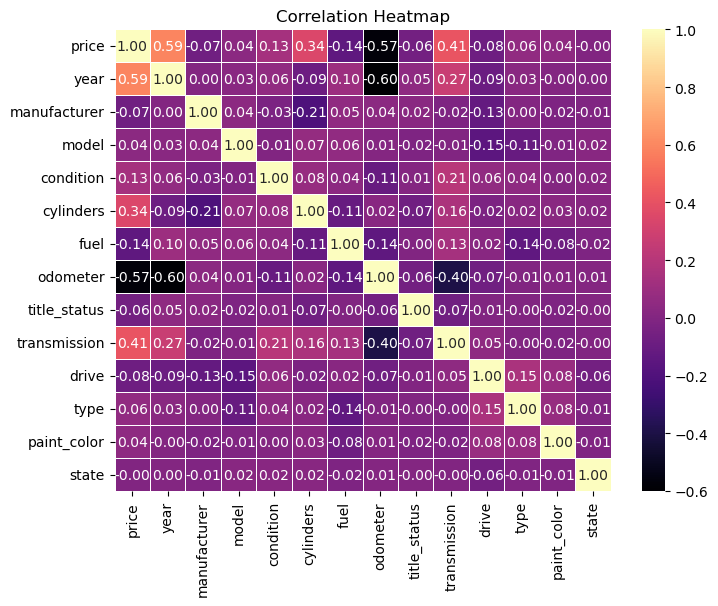

In [182]:
#Lets also create a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,    
    fmt=".2f",            
    linewidths=0.5,
    cmap = "magma"
)
plt.title("Correlation Heatmap")
plt.show("png")

Some observations of corelation for price:

Year (0.592752):
Strong positive correlation. Newer cars tend to have higher prices, which is a common trend.

Cylinders (0.344713):
Moderate positive correlation. Cars with more cylinders often have higher prices due to engine size and power.

Transmission (0.414717):
Moderate positive correlation. Certain transmission types (e.g., automatic) may contribute to higher car prices.

Odometer (-0.571841):
Strong negative correlation. Cars with higher mileage generally have lower prices due to depreciation.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Now, we have some basic cleaned dataset with us, lets start modeling.

In [183]:
#Drop price value to start create train set

X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']

In [184]:
#Create train and test set using train_test_split. Considering a 70:30 split here.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [185]:
#Using MinMaxScaler to keep values positive

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We will begin our analysis by creating a simple linear regression model, using data scaled with the MinMaxScaler to ensure all features are on the same scale. The model's performance will be evaluated using key metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Rsquared Score, to comprehensively assess its accuracy and predictive power. 

In [186]:
pipeline_linear = Pipeline([('scaler', MinMaxScaler()),
                     ('linear', LinearRegression())]).fit(X_train_scaled, y_train)


train_preds = pipeline_linear.predict(X_train_scaled)
test_preds = pipeline_linear.predict(X_test_scaled)

train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)

train_mae = mean_absolute_error(train_preds, y_train)
test_mae = mean_absolute_error(test_preds, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2_score = r2_score(train_preds, y_train)
test_r2_score = r2_score(test_preds, y_test)

linear_coefs = pipeline_linear['linear'].coef_

print(f" linear_coefs: {linear_coefs}\n")  

print(f"Linear Model Performance:")
print(f"  Train MSE: {train_mse} | Test MSE: {test_mse}")
print(f"  Train MAE: {train_mae} | Test MAE: {test_mae}")
print(f"  Train RMSE: {train_rmse} | Test RMSE: {test_rmse}")
print(f"  Train R-squared score: {train_r2_score} | Test R-squared score: {test_r2_score}\n")
print(pipeline_linear.score(X_test_scaled, y_test))
pipeline_linear

 linear_coefs: [ 24338.62668038    798.4967894     334.52429069   1584.93773031
  22565.39145867 -18138.15527945 -17296.00507821  -4311.24921143
   5442.62774028  -1921.91602681    717.99608827    867.08704774
   -413.1934513 ]

Linear Model Performance:
  Train MSE: 53992259.48754539 | Test MSE: 54642187.7527395
  Train MAE: 5245.99236671001 | Test MAE: 5261.989970738157
  Train RMSE: 7347.942534311587 | Test RMSE: 7392.0354269131785
  Train R-squared score: 0.4352303016963607 | Test R-squared score: 0.42581245653295485

0.6364013287164718


Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

To ensure consistency in evaluating all models, we will use the same performance metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Rsquared Score. To streamline the process and avoid redundancy, we'll create a reusable method to compute and display these metrics across all our models.

In [187]:
def evaluate_models (pipeline_poly, X_train_scaled,X_test_scaled, y_train, y_test, regtype) :
    train_preds = pipeline_poly.predict(X_train_scaled)
    test_preds = pipeline_poly.predict(X_test_scaled)

    train_mse = mean_squared_error(train_preds, y_train)
    test_mse = mean_squared_error(test_preds, y_test)
    
    train_mae = mean_absolute_error(train_preds, y_train)
    test_mae = mean_absolute_error(test_preds, y_test)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    train_r2_score = r2_score(train_preds, y_train)
    test_r2_score = r2_score(test_preds, y_test)
    
    reg_coefs = pipeline_poly[regtype].coef_
    
    print(f" coefs: {reg_coefs}\n")  
    
    print(f"Polynomial model of degree {deg} Model Performance:")
    print(f"  Train MSE: {train_mse} | Test MSE: {test_mse}")
    print(f"  Train MAE: {train_mae} | Test MAE: {test_mae}")
    print(f"  Train RMSE: {train_rmse} | Test RMSE: {test_rmse}")
    print(f"  Train R-squared score: {train_r2_score} | Test R-squared score: {test_r2_score}\n")
    performance = pipeline_poly.score(X_test_scaled, y_test)
    print(performance)
    pipeline_poly
    return {
        'degree': deg,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2_score,
        'test_r2': test_r2_score,
        'pipeline': pipeline_poly,
        'performance': performance,
        'y_preds': test_preds
    }

Our second model is a Polynomial Regression model, where we consider polynomial degrees ranging from 1 to 4. Increasing the degree beyond 4 significantly increases computational complexity without meaningful improvements in model performance. In fact, higher degrees may lead to overfitting and reduced efficiency, making the model less practical and harder to interpret. We will reuse our method evaluate_models() for analyzing performance metrics

In [188]:
def create_polyfeature_regression(deg, X_train_scaled, X_test_scaled, y_train, y_test, regtype ):
    pipeline_poly = Pipeline([('scaler', MinMaxScaler()),
              ('feature', PolynomialFeatures(degree=deg, include_bias=False)),
              ('linear', LinearRegression())]).fit(X_train_scaled, y_train)
    return evaluate_models(pipeline_poly,X_train_scaled, X_test_scaled, y_train, y_test, regtype)
    
    


In [189]:
results = []

for deg in range(1, 5):
    result = create_polyfeature_regression(deg, X_train_scaled, X_test_scaled, y_train, y_test, "linear" )
    results.append(result)
    
degrees = [res['degree'] for res in results]
performance_list1 = [res['test_mse'] for res in results]

 coefs: [ 24338.62668037    798.4967894     334.52429069   1584.93773031
  22565.39145867 -18138.15527945 -17296.00507821  -4311.24921143
   5442.62774028  -1921.91602681    717.99608827    867.08704774
   -413.1934513 ]

Polynomial model of degree 1 Model Performance:
  Train MSE: 53992259.487545386 | Test MSE: 54642187.752739444
  Train MAE: 5245.992366710117 | Test MAE: 5261.989970738266
  Train RMSE: 7347.942534311587 | Test RMSE: 7392.035426913175
  Train R-squared score: 0.43523030169630705 | Test R-squared score: 0.42581245653290056

0.6364013287164723
 coefs: [-10048.84089713  -7159.46730229  -7938.5041066   -3247.37594567
 -29028.05093652 -26729.8240804    -688.83600529   3372.97779022
   6727.78389731  -8940.72075435   4983.84912445   -477.34849408
  -1689.75122993  28076.94738718   1203.71495771   1353.47348926
   2501.83550553  33798.36453468 -19112.42872165 -16340.05305564
  -6240.39076414 -19113.2087575   -7521.88613742   2919.48752178
    206.24620022   -180.16336453   4

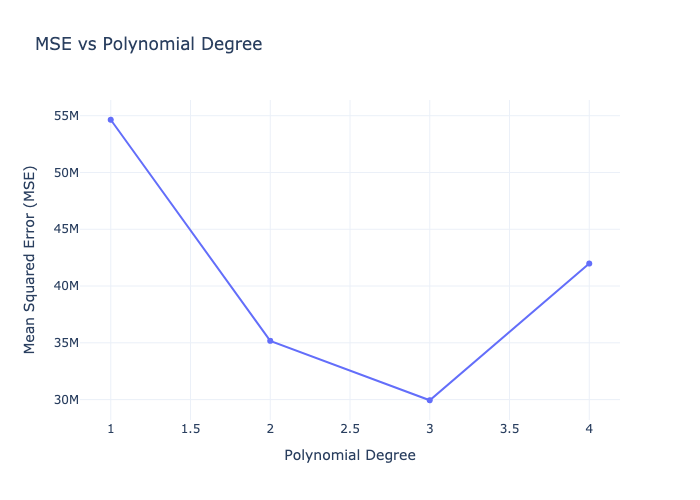

In [190]:
# Plotting with Plotly. For simplicity, better visualization and analysis, lets plot mse
import plotly.graph_objects as go

fig_mse = go.Figure()

fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list1, 
    mode='lines+markers', 
    name='Linear Reg - all features'
))

fig_mse.update_layout(
    title="MSE vs Polynomial Degree",
    xaxis_title="Polynomial Degree",
    yaxis_title="Mean Squared Error (MSE)",
    template="plotly_white"
)

fig_mse.show("png")

We observe that the lowest MSE is achieved at a polynomial degree of 3. To further refine our model, we’ll explore how it performs with a subset of features. However, selecting the optimal subset is crucial for meaningful analysis. To accomplish this, we will use a RandomForestRegressor to identify the most important features for our analysis.

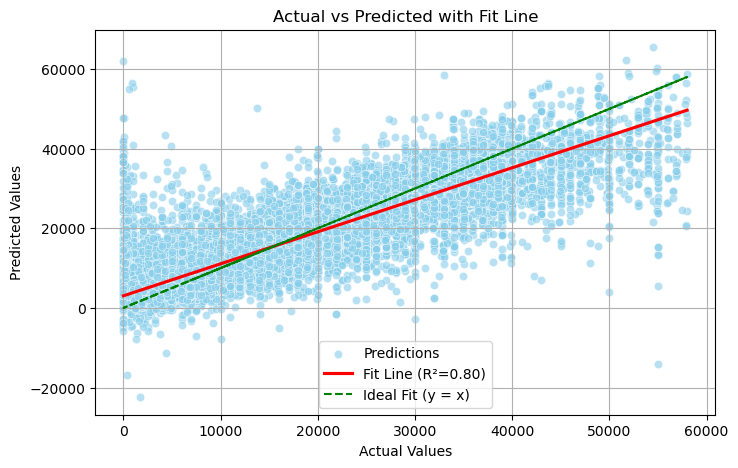

In [191]:
#Let us plot our model predicion
test_preds = [res['y_preds'] for res in results][2]
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

# Customize plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show("png")

The model demonstrates strong predictive accuracy, as evidenced by the Rsquared value. The line is close to the green ideal fit line. While predictions align closely with actual values for the majority of the data, some underestimation is evident for higher actual values.

<Axes: >

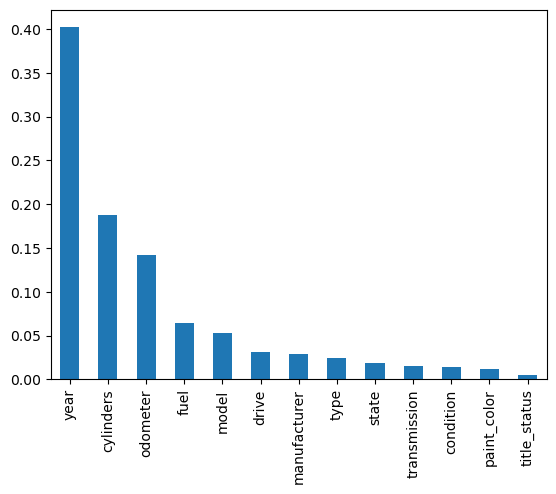

In [192]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')

Our model identifies 'year', 'cylinders', 'odometer', 'fuel', and 'model' as the top five most important features. We will use these features as the initial subset for our analysis.

In [193]:
X = df_encoded[['year', 'cylinders', 'odometer', 'fuel', 'model']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [194]:
# using MinMaxScaler again here to keep values non-negative

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
results = []

for deg in range(1, 5):
    result = create_polyfeature_regression(deg, X_train_scaled, X_test_scaled, y_train, y_test, "linear")
    results.append(result)

degrees = [res['degree'] for res in results]
performance_list2 = [res['test_mse'] for res in results]


 coefs: [ 25740.03789947  24712.66307859 -19434.63996415 -17070.49828887
    525.43152903]

Polynomial model of degree 1 Model Performance:
  Train MSE: 58257973.512754776 | Test MSE: 59225525.85766224
  Train MAE: 5617.090029178823 | Test MAE: 5652.085458810603
  Train RMSE: 7632.691105550832 | Test RMSE: 7695.8122285865475
  Train R-squared score: 0.3621490461749064 | Test R-squared score: 0.3482078635083945

0.6059029955872401
 coefs: [-21816.08577271 -42645.56974169  -1642.65685    -30862.95443748
 -12157.97825489  32522.73119251  39969.34997438  -9486.32739762
 -22966.86851597   1999.81867975  40327.70546896 -25083.17418658
    866.5191287    2234.87337661  13444.20471161  -6545.89426849
   -482.09234698  34736.59074261   5388.45424739   7668.3316836 ]

Polynomial model of degree 2 Model Performance:
  Train MSE: 41654742.099714115 | Test MSE: 42455497.62596974
  Train MAE: 4362.709690225123 | Test MAE: 4375.551071194816
  Train RMSE: 6454.048504598808 | Test RMSE: 6515.7883349576

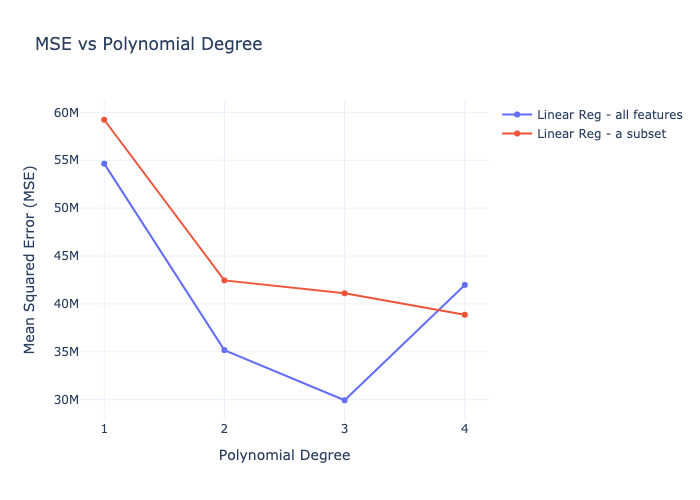

In [196]:
#Lets see aaping to our original plot for a batter analysis
fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list2, 
    mode='lines+markers', 
    name='Linear Reg - a subset'
))

fig_mse.show("png")

The graph shows that our first model outperformed the one with the smaller subset of features. However, both models achieved their lowest MSE at a polynomial degree of 3, indicating that this degree may be optimal for capturing the underlying patterns in the data. Let's however try with a smaller subset. If the trend is followed, then the model with a smaller subset should have a higher mse. Let's find out.

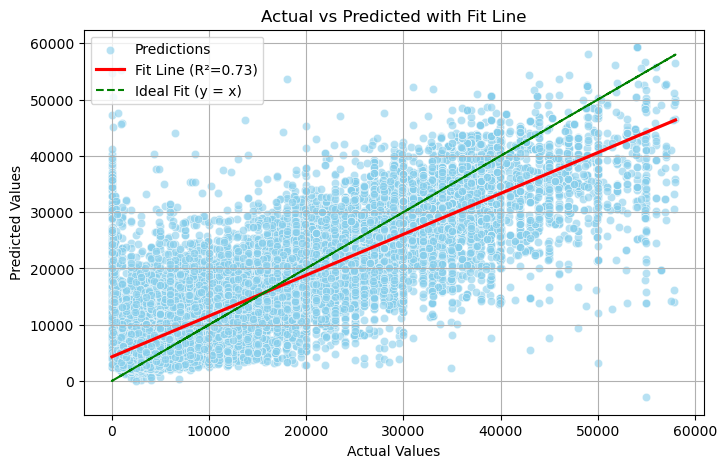

In [197]:
#Let us see how well our regression model's predictions align with the actual target values.

test_preds = [res['y_preds'] for res in results][2]
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show()

The model performs well for lower price ranges but underestimates higher values, as seen from the deviation of the fit line from the ideal fit.

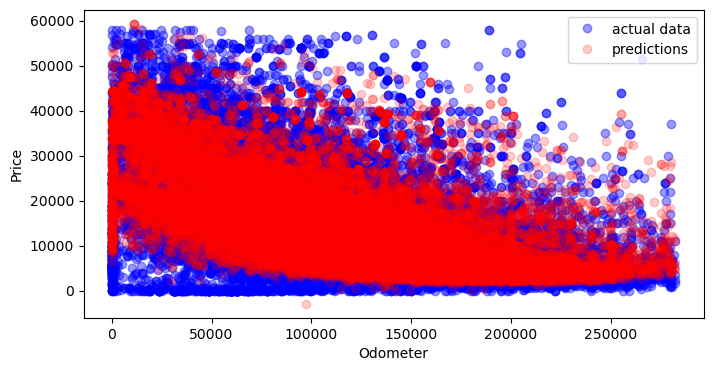

In [198]:
#We are going to take out 'odometer' from our subset in the next step, lets plot and see how has our model performed

fig1, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.plot(X_test['odometer'], y_test, 'ob', label='actual data', alpha=0.4)
axes.plot(X_test['odometer'], test_preds, 'or', label='predictions', alpha=0.2)
axes.set(xlabel='Odometer', ylabel='Price')
axes.legend()
plt.show("png")

Our prediction model shows a clear negative trend between Odometer and Price suggesting that the model is capturing the general relationship between odometer readings and price reasonably well. The model's accuracy decreases slightly for higher odometer readings.

Let's proceed by creating a more compact dataset using the two most influential features, 'year' and 'cylinders', to simplify our analysis while retaining the most critical predictors.

In [199]:
X = df_encoded[['year', 'cylinders']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [200]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
results = []

for deg in range(1, 5):
    result = create_polyfeature_regression(deg, X_train_scaled, X_test_scaled, y_train, y_test, "linear")
    results.append(result)

degrees = [res['degree'] for res in results]
performance_list3 = [res['test_mse'] for res in results]

 coefs: [36940.03896934 26801.34283175]

Polynomial model of degree 1 Model Performance:
  Train MSE: 73187368.36013299 | Test MSE: 73900871.90926868
  Train MAE: 6417.2021326913855 | Test MAE: 6426.105250353544
  Train RMSE: 8554.961622364708 | Test RMSE: 8596.561632959347
  Train R-squared score: 0.042117610418799134 | Test R-squared score: 0.02662947668755966

0.5082506770319211
 coefs: [-66055.19534709 -65087.81966317  60050.59532217  57363.12215217
  47220.00737032]

Polynomial model of degree 2 Model Performance:
  Train MSE: 56795189.928339355 | Test MSE: 57225406.29791082
  Train MAE: 5232.7634327574115 | Test MAE: 5237.0060605262415
  Train RMSE: 7536.258350689642 | Test RMSE: 7564.747603053972
  Train R-squared score: 0.38796676723383083 | Test R-squared score: 0.3801968825451568

0.6192121408510542
 coefs: [-31605.09093625 -66797.25406353  18371.56505738  20240.94015877
  67279.89703457   8915.64502998  41051.34175881  -5949.19052493
 -10646.05898472]

Polynomial model of de

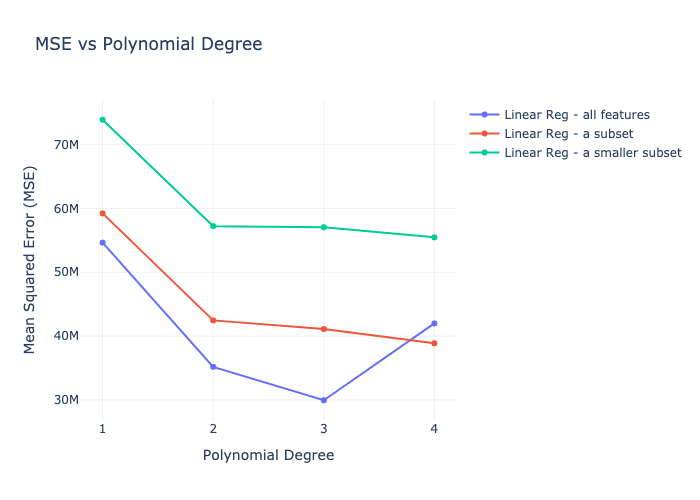

In [202]:
fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list3, 
    mode='lines+markers', 
    name='Linear Reg - a smaller subset'
))

fig_mse.show("png")

As anticipated, the model trained on the smallest dataset in our tests exhibited the highest MSE among the three, highlighting the impact of reduced feature availability on prediction accuracy.

lets plot some more figures to judge our model performance

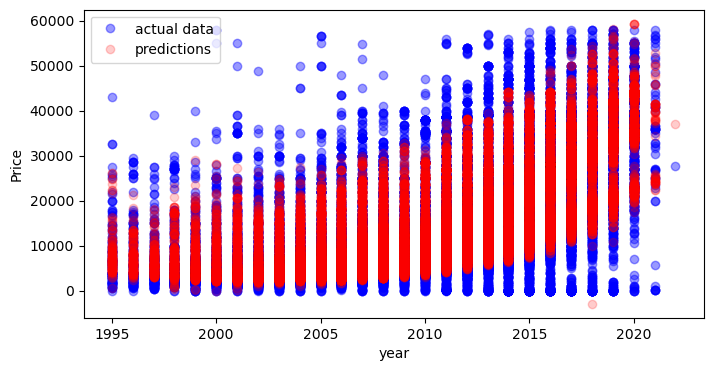

In [203]:
fig1, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.plot(X_test['year'], y_test, 'ob', label='actual data', alpha=0.4)
axes.plot(X_test['year'], test_preds, 'or', label='predictions', alpha=0.2)
axes.set(xlabel='year', ylabel='Price')
axes.legend()
plt.show("png")

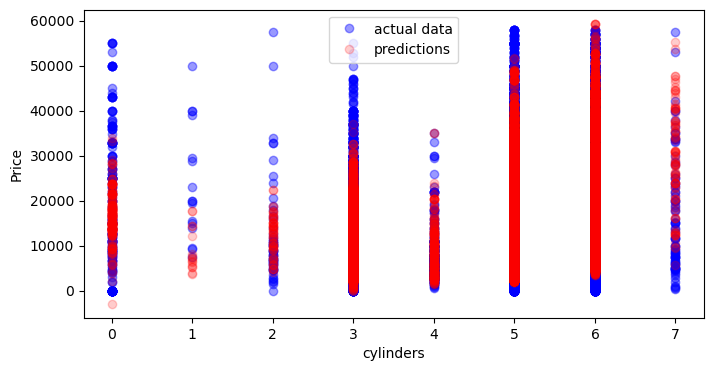

In [204]:
fig1, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.plot(X_test['cylinders'], y_test, 'ob', label='actual data', alpha=0.4)
axes.plot(X_test['cylinders'], test_preds, 'or', label='predictions', alpha=0.2)
axes.set(xlabel='cylinders', ylabel='Price')
axes.legend()
plt.show("png")

The model performs well in capturing the overall trend between car year and price. However, slight deviations for older and newer cars highlight potential areas for improvement, such as incorporating additional features or addressing data variability. The strong alignment in most years demonstrates the model's ability to generalize effectively across the dataset.

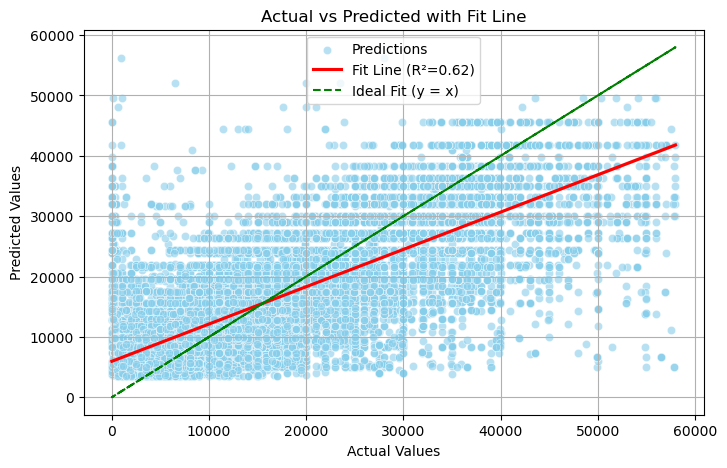

In [205]:
#Let us see how well our regression model's predictions align with the actual target values.

test_preds = [res['y_preds'] for res in results][2]
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show("png")

The model predicts well for low to mid-range values but struggles with higher actual values, leading to underestimation.

Let's set up a Lasso Regression pipeline, train it, and evaluate its performance on our dataset as before

In [206]:
def create_lasso_regression(deg, X_train, X_test, y_train, y_test ):
    lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = deg, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))]).fit(X_train_scaled, y_train)
    feature_names = lasso_pipe.named_steps['polyfeatures'].get_feature_names_out()
    lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
    lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
    print(lasso_df)
    return evaluate_models(lasso_pipe,X_train_scaled, X_test_scaled, y_train, y_test, 'lasso')

In [207]:
#Let's create a new train test dataset as we had modified features in our previous steps

X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
results = []
for deg in range(1, 5):
    result = create_lasso_regression(deg, X_train, X_test, y_train, y_test)
    results.append(result)
    
degrees = [res['degree'] for res in results]
performance_list4 = [res['test_mse'] for res in results]

  feature         coef
0      x0  7681.618993
1      x1  4896.508017
 coefs: [7681.6189926  4896.50801686]

Polynomial model of degree 1 Model Performance:
  Train MSE: 73187370.5529977 | Test MSE: 73900965.40240121
  Train MAE: 6417.300345834238 | Test MAE: 6426.2055565809305
  Train RMSE: 8554.961750528035 | Test RMSE: 8596.567070778963
  Train R-squared score: 0.041802032692006885 | Test R-squared score: 0.026308200377570423

0.5082500549122703
  feature          coef
0      x0 -13650.499238
1      x1 -11790.023516
2    x0^2  13674.581548
3   x0 x1   9957.295167
4    x1^2  10427.370633
 coefs: [-13650.49923797 -11790.02351577  13674.58154795   9957.29516684
  10427.37063335]

Polynomial model of degree 2 Model Performance:
  Train MSE: 56795550.52525254 | Test MSE: 57229029.31918531
  Train MAE: 5233.662372051062 | Test MAE: 5237.886203746468
  Train RMSE: 7536.282274785926 | Test RMSE: 7564.9870666898905
  Train R-squared score: 0.3871720398416596 | Test R-squared score: 0.37936066

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.255e+11, tolerance: 1.137e+09



   feature          coef
0       x0  -7114.562349
1       x1 -11044.213204
2     x0^2   4674.494703
3    x0 x1   3968.227501
4     x1^2  11863.143694
5     x0^3   2180.094974
6  x0^2 x1   6043.285474
7  x0 x1^2   -468.041576
8     x1^3   -661.568540
 coefs: [ -7114.56234886 -11044.21320408   4674.4947033    3968.22750133
  11863.14369353   2180.09497431   6043.28547402   -468.04157585
   -661.56854009]

Polynomial model of degree 3 Model Performance:
  Train MSE: 56652189.039763674 | Test MSE: 57091898.63947473
  Train MAE: 5216.006781838116 | Test MAE: 5217.7976296356155
  Train RMSE: 7526.764845520529 | Test RMSE: 7555.918120220383
  Train R-squared score: 0.38982668291916156 | Test R-squared score: 0.3820744146894599

0.6201005241535896
      feature          coef
0          x0  -8688.658394
1          x1 -12002.433903
2        x0^2   6478.465834
3       x0 x1   4944.478016
4        x1^2  11574.055545
5        x0^3   3570.292671
6     x0^2 x1   4048.808151
7     x0 x1^2   1035.35934

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+12, tolerance: 1.137e+09



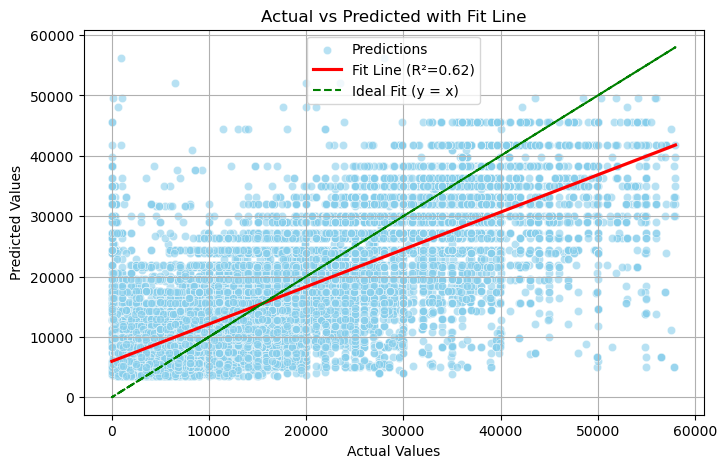

In [208]:
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

# Customize plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show("png")  

The model performs reasonably well for smaller actual values (up to ~20,000).
Its accuracy decreases for higher actual values, as predictions consistently underestimate. Let's try adding a hyperparameter for Lasso

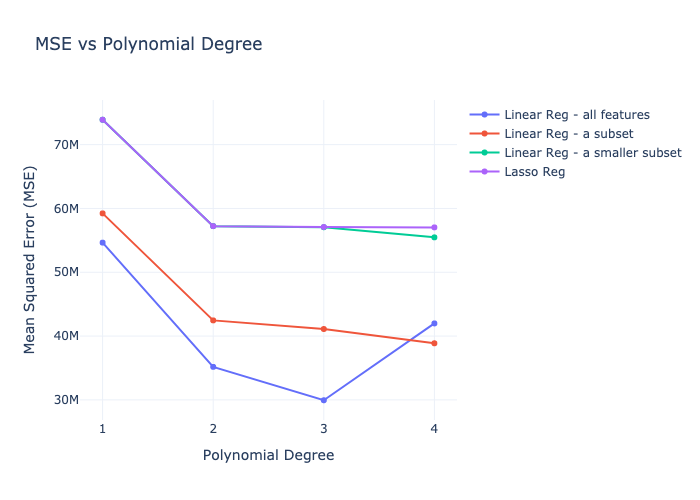

In [209]:
#Lets plot on the same one.

fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list4, 
    mode='lines+markers', 
    name='Lasso Reg'
))

fig_mse.show("png")

In [210]:
from sklearn.model_selection import GridSearchCV, train_test_split

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()), 
    ('lasso', Lasso(max_iter=10000, random_state=42))
])

param_grid = {'lasso__alpha': 10 ** np.linspace(-5, 5, 100)}

grid_search = GridSearchCV(
    pipeline_lasso,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MSE:", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'lasso__alpha': 1e-05}
Best Cross-Validated MSE: 54015641.004341304
Test MSE: 54642187.7538, Test R²: 0.6364


The hyperparameter alpha used here for Lasso is extremely small, essentially negligible. With such a minimal value, the regularization effect is almost nonexistent, causing the model to behave very similarly to standard linear regression. Let's move also to our next model. In this, we are using SequentialFeatureSelector that helps identify the most relevant features. 

In [211]:
from sklearn.feature_selection import SequentialFeatureSelector
def create_sequantialFeatuerSelector(deg, X_train_scaled, X_test_scaled, y_train, y_test):
    sequential_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = deg, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
                           ('scaler', StandardScaler()),
                           ('linreg', LinearRegression())]).fit(X_train_scaled, y_train)
    
    return evaluate_models(sequential_pipe,X_train_scaled, X_test_scaled, y_train, y_test, 'linreg')

In [212]:
X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
results = []
for deg in range(1, 5):
    result = create_sequantialFeatuerSelector(deg, X_train, X_test, y_train, y_test)
    results.append(result)
    
degrees = [res['degree'] for res in results]
performance_list5 = [res['test_mse'] for res in results]

 coefs: [ 5241.76635856  4143.84271617 -2526.7712328  -3591.35097327
  -736.88606877  1834.13154032]

Polynomial model of degree 1 Model Performance:
  Train MSE: 54825750.66874076 | Test MSE: 55452719.9454805
  Train MAE: 5308.441798244021 | Test MAE: 5328.335630440965
  Train RMSE: 7404.441279984652 | Test RMSE: 7446.658307286598
  Train R-squared score: 0.4214678973749927 | Test R-squared score: 0.4122864762591949

0.6310079057875303
 coefs: [-1097047.13778221  1102778.32193784     1857.25621789     5083.53514832
    -1360.83784444    -2920.69834748]

Polynomial model of degree 2 Model Performance:
  Train MSE: 49399080.14402915 | Test MSE: 49684655.12754593
  Train MAE: 5007.929263441145 | Test MAE: 5005.088032956573
  Train RMSE: 7028.447918568448 | Test RMSE: 7048.734292590829
  Train R-squared score: 0.5069640544908424 | Test R-squared score: 0.5012026039446524

0.6693896176100613
 coefs: [-539045.75255864   -2972.20889675  544710.8346075     2009.90024328
    5575.18311116   -1

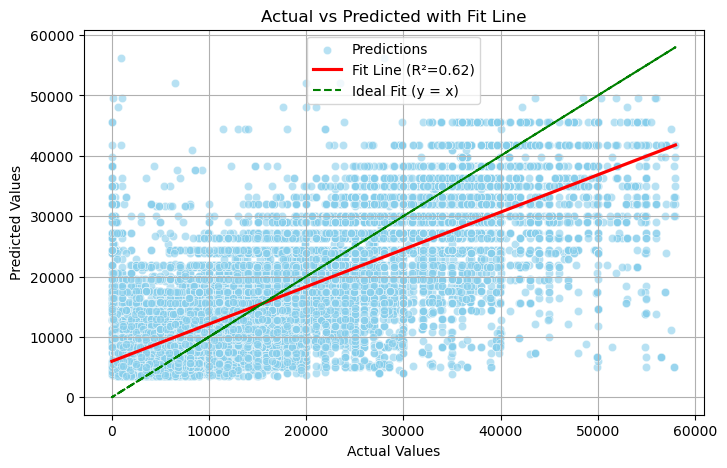

In [213]:
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

# Customize plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show("png") 

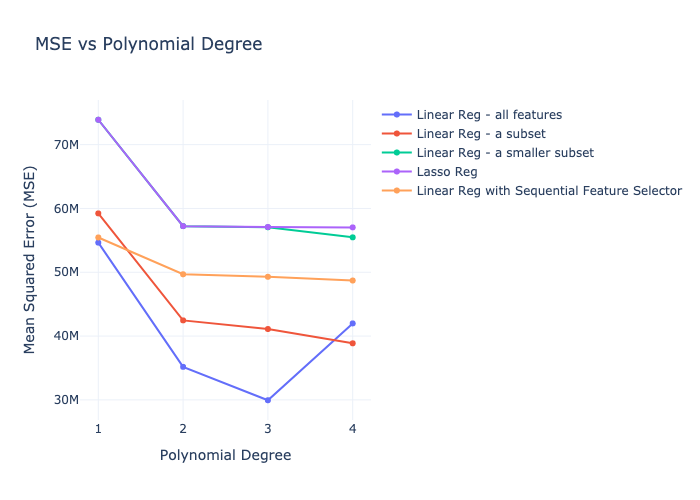

In [214]:

fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list5, 
    mode='lines+markers', 
    name='Linear Reg with Sequential Feature Selector'
))
fig_mse.show("png")

Still our first model, simple LinesrRegression, seems to be performing better than anything else. Though mse for 'Linear Reg with Sequential Feature Selector' has improved over 'Lasso reg' and ' Linear reg with the smallest subset', it still has greater mse than the other two models. 

Our next model is LinearRegression which is using Lasso as feature selector. 

In [215]:
from sklearn.feature_selection import SelectFromModel
def create_lassoAsFeatuerSelector(deg, X_train_scaled, X_test_scaled, y_train, y_test):
    lasso_feature_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = deg, include_bias = False)),
                                            ('scaler', StandardScaler()),
                                            ('selector', SelectFromModel(Lasso())),
                                            ('linreg', LinearRegression())]).fit(X_train_scaled, y_train)
    
    return evaluate_models(lasso_feature_selector_pipe,X_train_scaled, X_test_scaled, y_train, y_test, 'linreg')

In [216]:
X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
results = []
for deg in range(1, 5):
    result = create_lassoAsFeatuerSelector(deg, X_train, X_test, y_train, y_test)
    results.append(result)
    
degrees = [res['degree'] for res in results]
performance_list6 = [res['test_mse'] for res in results]

 coefs: [ 5061.89888847   223.43976968    90.53996132   364.79414155
  4123.53805795 -2483.54424317 -3733.57492137  -749.59609754
  1793.46048837  -745.91589834   244.13316438   317.38827574
  -123.01048692]

Polynomial model of degree 1 Model Performance:
  Train MSE: 53992259.48754525 | Test MSE: 54642187.75273936
  Train MAE: 5245.99236671 | Test MAE: 5261.989970738147
  Train RMSE: 7347.942534311578 | Test RMSE: 7392.035426913169
  Train R-squared score: 0.4352303016963607 | Test R-squared score: 0.42581245653295474

0.6364013287164727


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.744e+11, tolerance: 1.137e+09



 coefs: [-8.65427956e+05 -2.57587782e+04 -1.85575601e+03 -4.10081415e+04
 -4.65467315e+05  1.88037224e+05  2.59554725e+05  4.65709822e+05
  2.15703757e+05 -7.03273444e+04 -1.15900441e+02  2.48160774e+03
  8.69696773e+05  2.39570161e+04  4.06307573e+04  4.63434043e+05
 -1.93461554e+05 -2.60879327e+05 -5.43054330e+02 -4.68279678e+05
 -2.20796471e+05  7.26019535e+04 -3.02467648e+03  1.25171973e+03
 -5.67551545e+02 -2.09232980e+02  6.46711132e+02  1.12643583e+03
  4.39887849e+02 -6.33776816e+01  2.56040683e+02 -1.31682963e+02
 -4.86758100e+02 -1.83045750e+02 -2.10327912e+02  1.09902024e+03
 -2.65142746e+01  8.46156351e+02  8.82843265e+02 -2.89917870e+02
 -5.85770328e+01  8.87053077e+01 -3.06374504e+02  6.38765935e+02
 -1.45293500e+02 -1.39824089e+02 -2.57354525e+02  1.72802553e+02
  9.07036371e+02 -5.72361215e+02 -1.61692250e+02  2.85517234e+03
 -1.79903114e+02  2.45169491e+02  3.38429288e+02 -3.01799063e+02
  5.99050074e+03  4.58987896e+02 -3.56727100e+03 -5.49185449e+02
 -2.42912855e+02 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.491e+11, tolerance: 1.137e+09



 coefs: [-2.46160252e+06  3.32337469e+03 -3.90035702e+05  3.43668573e+07
 -2.28487649e+06 -1.65670310e+07  7.79383034e+04  9.36092310e+14
  7.50183988e+13 -3.72930009e+06  6.33543549e+03  2.01398400e+06
  4.08193450e+06 -4.19199439e+05 -6.99358512e+07  3.71250327e+06
  3.31783067e+07  1.08539795e+08  7.35525561e+06 -4.18250169e+06
  1.89967107e+03  1.50034800e+05  6.02144909e+04 -4.25228820e+04
  2.56264314e+05  5.03343429e+03 -7.34786328e+04  1.40758023e+05
  2.69450451e+04  2.53633130e+02 -4.46027080e+04  1.13422410e+05
 -3.46925221e+05  1.41210234e+04  1.48161649e+05 -1.39734180e+04
  1.04918312e+05 -1.26642383e+03  1.07093160e+05  4.37569336e+02
 -2.35777344e+02  4.84948111e+05  8.28707578e+04 -3.52696680e+04
  1.10775312e+04 -6.27227812e+04 -2.24411922e+05  1.23376324e+05
  9.95253906e+01  2.05914062e+02  5.91543359e+04 -1.12035375e+05
  1.05121189e+06  2.75190652e+05  4.25775508e+05  2.13017000e+05
  5.48626797e+04  7.93052803e+04  4.12859141e+04 -1.00821570e+05
  1.83221875e+04 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.174e+11, tolerance: 1.137e+09



 coefs: [ 1.59386496e+10 -6.59450913e+05 -6.23504956e+03 ...  3.12830466e+03
  9.04254150e+01  1.73508502e+03]

Polynomial model of degree 4 Model Performance:
  Train MSE: 23423260.591857046 | Test MSE: 26551529.565736998
  Train MAE: 3209.477204648005 | Test MAE: 3349.685210691266
  Train RMSE: 4839.758319571035 | Test RMSE: 5152.817633658016
  Train R-squared score: 0.8143521971188329 | Test R-squared score: 0.7903679114589843

0.8233214798365522


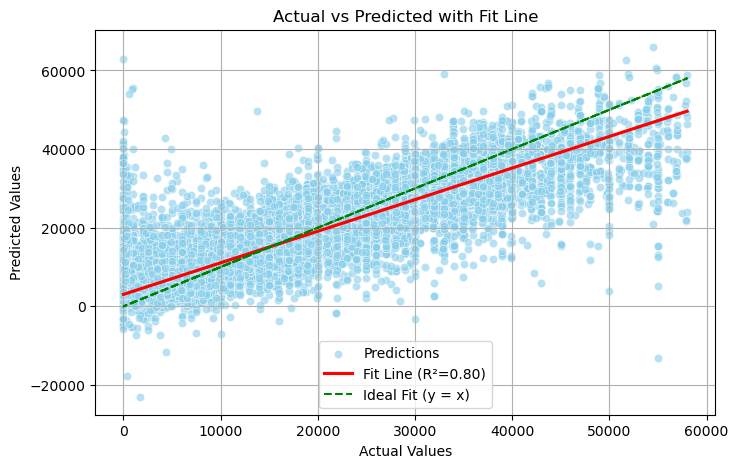

In [217]:

test_preds = [res['y_preds'] for res in results][2]
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show()

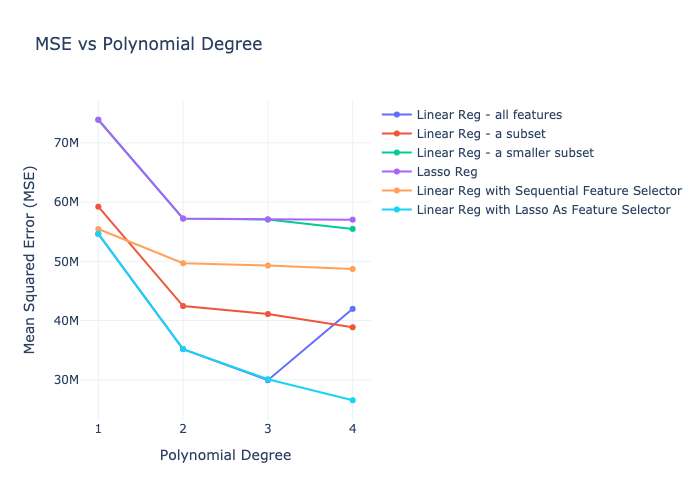

In [218]:
fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list6, 
    mode='lines+markers', 
    name='Linear Reg with Lasso As Feature Selector'
))
fig_mse.show("png")

This model shows that the polunomial degree of 4 can yield better results with a lower mse. But considering the computational cost, I would prefer to have a degree of 3.

We will get hyperparameter for Ridge regression, just like we tried for Lasso and observe the results

In [219]:
from sklearn.model_selection import GridSearchCV

X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline_ridge = Pipeline([('scaler', StandardScaler()),
                           ('ridge', Ridge())]).fit(X_train_scaled, y_train)

param_grid = {'ridge__alpha': 10**np.linspace(-5,5,100)}

grid_search = GridSearchCV(
    pipeline_ridge,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MSE:", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse:.4f}, Test R_squared: {test_r2:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'ridge__alpha': 18.30738280295366}
Best Cross-Validated MSE: 54015636.62782782
Test MSE: 54642185.1172, Test R_squared: 0.6364


The ridge alpha is 18.307 and sounds promising, let us use that in our next model which is Ridge Regression.

In [220]:
def create_ridgeRegression(deg, X_train_scaled, X_test_scaled, y_train, y_test):
    ridge_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = deg, include_bias = False)),
                                            ('scaler', StandardScaler()),
                                            ('ridge', Ridge(alpha=18.30738280295366))]).fit(X_train_scaled, y_train)
    
    return evaluate_models(ridge_pipe,X_train_scaled, X_test_scaled, y_train, y_test, 'ridge')

In [221]:
X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
results = []
for deg in range(1, 5):
    result = create_ridgeRegression(deg, X_train, X_test, y_train, y_test)
    results.append(result)
    
degrees = [res['degree'] for res in results]
performance_list7 = [res['test_mse'] for res in results]

 coefs: [ 5060.68036211   223.10257942    90.62168748   364.83264631
  4122.41539336 -2482.8925534  -3733.21467302  -749.39688564
  1793.59110496  -745.91347387   244.23581726   317.37791454
  -122.95858339]

Polynomial model of degree 1 Model Performance:
  Train MSE: 53992262.79191044 | Test MSE: 54642185.11723873
  Train MAE: 5246.013988494066 | Test MAE: 5262.016719411867
  Train RMSE: 7347.942759161263 | Test RMSE: 7392.035248646934
  Train R-squared score: 0.4350382651633745 | Test R-squared score: 0.42561760648193403

0.6364013462535547
 coefs: [-1249.11469133  -173.73698799 -1755.17966569  -409.17535172
 -4837.37120311  -205.24581863  2086.57512598   472.3565789
   664.83818404  -748.01436865    67.04926418  -359.74173944
  -474.01380132  6247.70941263 -1162.8735556   -113.88334077
   125.77034197  3678.06136763 -5134.18466384 -5608.01573413
  -619.00089555 -2007.61517756 -5778.74133721  2005.07959144
    90.28070313  -219.99064299  1443.8384933   -937.71449198
  -167.78613203 

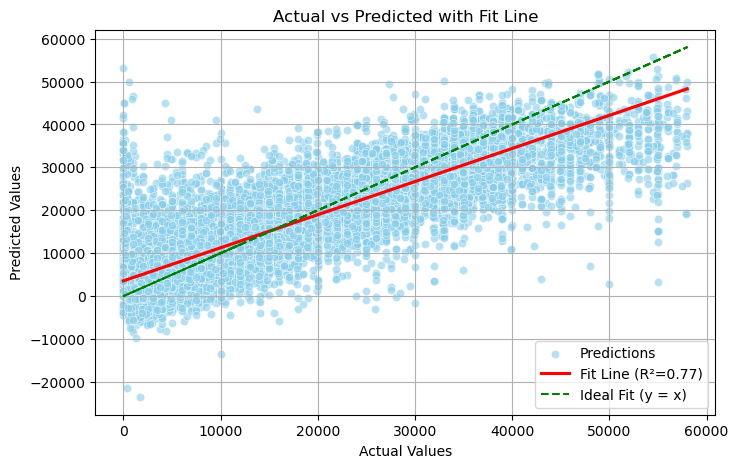

In [222]:
#Let us see how well our regression model's predictions align with the actual target values.

test_preds = [res['y_preds'] for res in results][2]
r2 = r2_score(y_test, test_preds)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_preds, color='skyblue', alpha=0.6, label='Predictions')
sns.regplot(x=y_test, y=test_preds, scatter=False, color='red', label=f'Fit Line (R²={r2:.2f})')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Ideal Fit (y = x)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Fit Line')
plt.legend()
plt.grid()
plt.show()

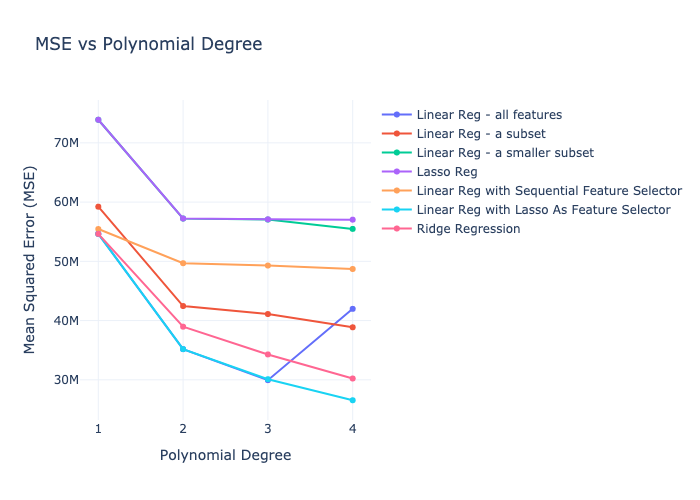

In [223]:
fig_mse.add_trace(go.Scatter(
    x=degrees, 
    y=performance_list7, 
    mode='lines+markers', 
    name='Ridge Regression'
))
fig_mse.show("png")

Ridge regression shows a promising behaviour for polynomial degree increase to 4. But, most of the models performed better at degree = 3. 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The dataset provided for this project was extensive but had significant challenges, including numerous missing values and inconsistencies. My goal was to maintain the dataset's integrity by minimizing alterations while ensuring it remained reflective of its original behavior. Throughout the analysis, I explored a variety of regression models to identify the best-performing approach for predicting car prices:

1. Linear Regression
2. Polynomial Regression with two subsets of features
3. Lasso Regression
4. Linear Regression combined with Sequential Feature Selector
5. Linear Regression with Lasso as a Feature Selector
6. Ridge Regression
In total, seven models were evaluated in this experiment.

Key Findings
1. Best Performing Model:
    The Polynomial Regression model with degree 3 delivered the best performance in terms of accuracy and interpretability.
    Higher-degree polynomials (e.g., degree 4 and above) required significantly more computational resources but offered marginal gains in accuracy, making them inefficient for this task.
    Lasso Regression Observations:

2. The hyperparameter
    For Lasso Regression showed negligible impact, making it less effective for this dataset. Consequently, using Lasso as a standalone model was unnecessary.
    Data Cleaning Insights:

3. Data cleaning insights
    The data cleaning process revealed valuable insights into feature relationships, as shown by the correlation heatmap. The cleaned dataset showed clear and logical relationships between key variables, improving model reliability.
    Challenges in Data Preparation:

4. Challenges in data preparation 
    Preparing the data was the most time-consuming aspect of this project. Handling missing values, encoding categorical features, and ensuring numerical consistency required meticulous effort but was essential for meaningful results.
    Feature Importance:

5. Feature Importance
    Across the models, vehicle year, odometer reading, and drive type consistently emerged as the most significant predictors of car price. Features like condition, fuel type, and cylinders also showed moderate importance.

Revisit
1. Revisit and Expand Features
    Incorporating additional features, such as horsepower, vehicle brand, or trim levels, could improve the model's predictive accuracy. These features are likely to capture nuances in car pricing that are not fully reflected in the current dataset.

2. Address Missing Data:
    Missing values remain a significant limitation. Gathering or imputing missing information, especially for critical features, could enhance the dataset's completeness and model reliability.

3. Expand Dataset Scope
    Including additional data, such as listing prices, transaction history, and dealer inventory metrics, could provide a more holistic understanding of pricing patterns. Features like geographic location or market trends could also offer valuable insights.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

After going through the dataset, analyzing it, I can summarize as below:
1. Vehicles from recent years consistently command higher prices. Prioritize acquiring these models during inventory restocking, especially if they feature desirable attributes like modern technology or fuel efficiency. So, Focus on newer vehicles
2. Cars with lower odometer readings retain more value and appeal to buyers.
3. Use the predictive model to set competitive and profitable prices. 
4. Emphasize vehicles with automatic transmission in your listings, as they positively impact pricing and align with buyer preferences.
5. Promote cars with desirable drive types (e.g., all-wheel drive, four-wheel drive) as these are associated with higher prices and better 6. performance in specific conditions.
7. Highlight vehicles in excellent condition 
8. With increasing interest in sustainability, feature fuel-efficient cars and hybrids prominently, as they may attract a growing segment of environmentally conscious buyers. But the cars still on gas are still on high demand which might continue for few more years.